# Importation des librairies

In [110]:
# WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns

# SCIKIT-LEARN: SELECTION DE VARIABLES

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 

# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# SCIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # Séparer en données train et test
from sklearn.model_selection import cross_val_score # Validation croisée pour comparison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation : visulaisr des scores lors du choix d'un hyper-paramètre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyper-paramètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage : visualisation des scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEURll
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


# Analyse exploratoire

## Chargement des données


In [111]:
data = pd.read_csv('./data/framingham.csv')
df = data.copy() 

## Description du dataset

In [112]:
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [113]:
df.tail(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [114]:
# Dimensions
df.shape

(4240, 16)

In [115]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [116]:
# Noms des variables
df.columns.values

array(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype=object)

In [117]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [118]:
df.dtypes.value_counts()

float64    9
int64      7
Name: count, dtype: int64

#### Variables

- sex: 0 (homme), 1 (femme)
- âge: âge du patient; (continue - Bien que les âges enregistrés aient été tronqués en nombres entiers, la notion d'âge est continue)
- currentSmoker: que le patient fume ou non (binaire)
- cigsPerDay: le nombre de cigarettes que la personne a fumé en moyenne par jour (peut être considéré comme continu car on peut avoir n'importe quel nombre de cigarettes, même une demi-cigarette).
- BPMeds: que le patient prenne ou non un traitement contre la tension artérielle (binaire)
- prevalentStroke: si le patient a déjà eu un accident vasculaire cérébral ou non (binaire)
- prevalentHyp: si le patient était hypertendu (binaire)
- diabetes: si le patient était diabétique ou non (binaire)
- totChol: taux de cholestérol total (continu)
- sysBP: pression artérielle systolique (continue)
- diaBP: pression artérielle diastolique (continue)
- BMI : Indice de masse corporelle (continu)
- heartRate: fréquence cardiaque (Continu - des variables telles que la fréquence cardiaque sont discrètes, mais sont considérées comme continues en raison du grand nombre de valeurs possibles.)
- glucose: niveau de glucose (continu)
- variabel cible: Risque de maladie coronarienne CHD sur 10 ans (binaire: «1» signifie «Oui», «0» signifie «Non»)

In [119]:
# Vérifier l'existence des duplications d'exemples 
duplicate_df = df[df.duplicated()]
duplicate_df
# df.duplicated().sum()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


## Etudes des valeurs manquantes

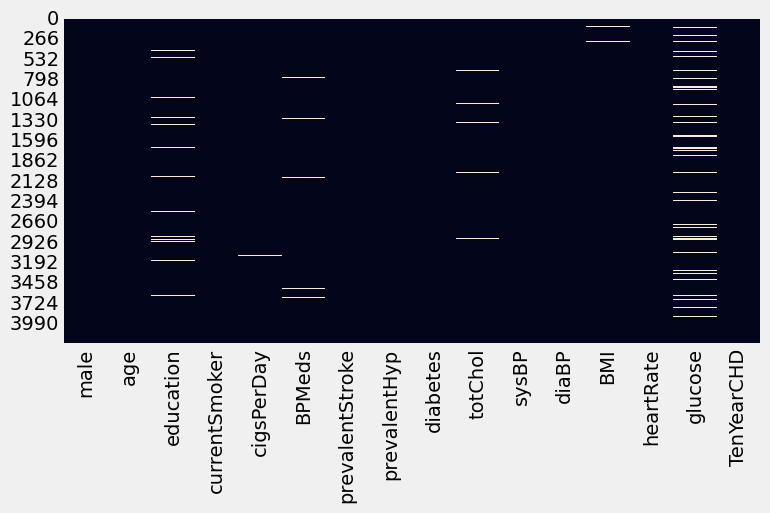

In [120]:
# Visualiser les valeurs manquantes
plt.figure(figsize=(8, 4))
sns.heatmap(df.isna(), cbar=False)
plt.show()

## Variable cible (target)

In [121]:
# Compter le nombre des exemples atteints de CHD
df['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

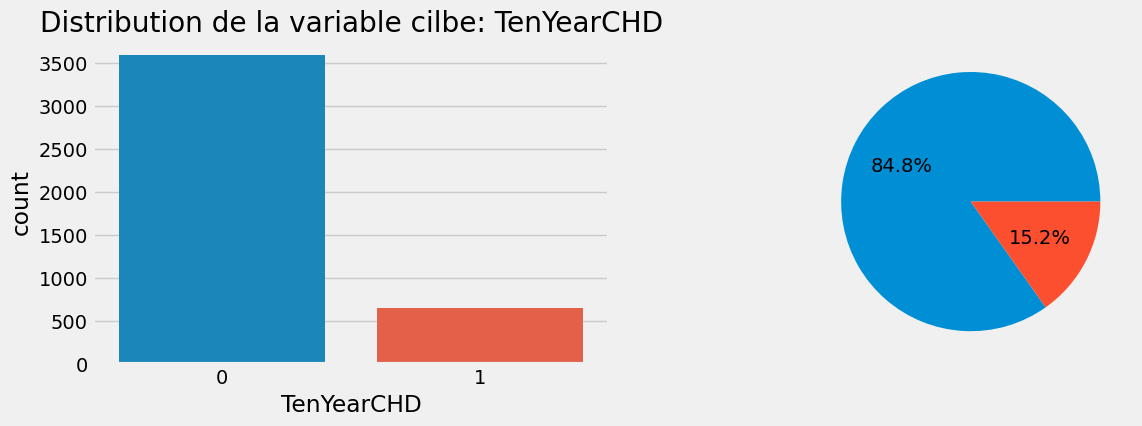

In [122]:
plt.figure(figsize=(8, 4))
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='TenYearCHD', data=df)
plt.title("Distribution de la variable cilbe: TenYearCHD")
plt.subplot(122)
plt.pie(df['TenYearCHD'].value_counts(), autopct='%1.1f%%')
plt.show()

## Analyse univariée

### Variables catégorielles

In [123]:
df['age'] = df['age'].astype(np.float64)

In [124]:
df.dtypes

male                 int64
age                float64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [125]:
# Ajouter 'education' et 'BPMeds' a cat_features
cat_features = df.select_dtypes('int64').columns
cat_features = cat_features.append(pd.Index(['education']))
cat_features = cat_features.append(pd.Index(['BPMeds']))
cat_features

Index(['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'TenYearCHD', 'education', 'BPMeds'],
      dtype='object')

In [126]:
df.select_dtypes('float64').columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP',
       'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [127]:
# Supprimer education' et 'BPMeds' de cont_features
cont_features = df.select_dtypes('float64').columns
cont_features.delete([1, 3])
cont_features = cont_features.delete([1, 3])
cont_features

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [128]:
for feature in cat_features:
    print(f'{feature :-<30} {df[feature].unique()}')

male-------------------------- [1 0]
currentSmoker----------------- [0 1]
prevalentStroke--------------- [0 1]
prevalentHyp------------------ [0 1]
diabetes---------------------- [0 1]
TenYearCHD-------------------- [0 1]
education--------------------- [ 4.  2.  1.  3. nan]
BPMeds------------------------ [ 0.  1. nan]


In [129]:
# for feature in cat_features:
#    plt.figure()
#    df[feature].value_counts().plot.pie()
#    plt.show()

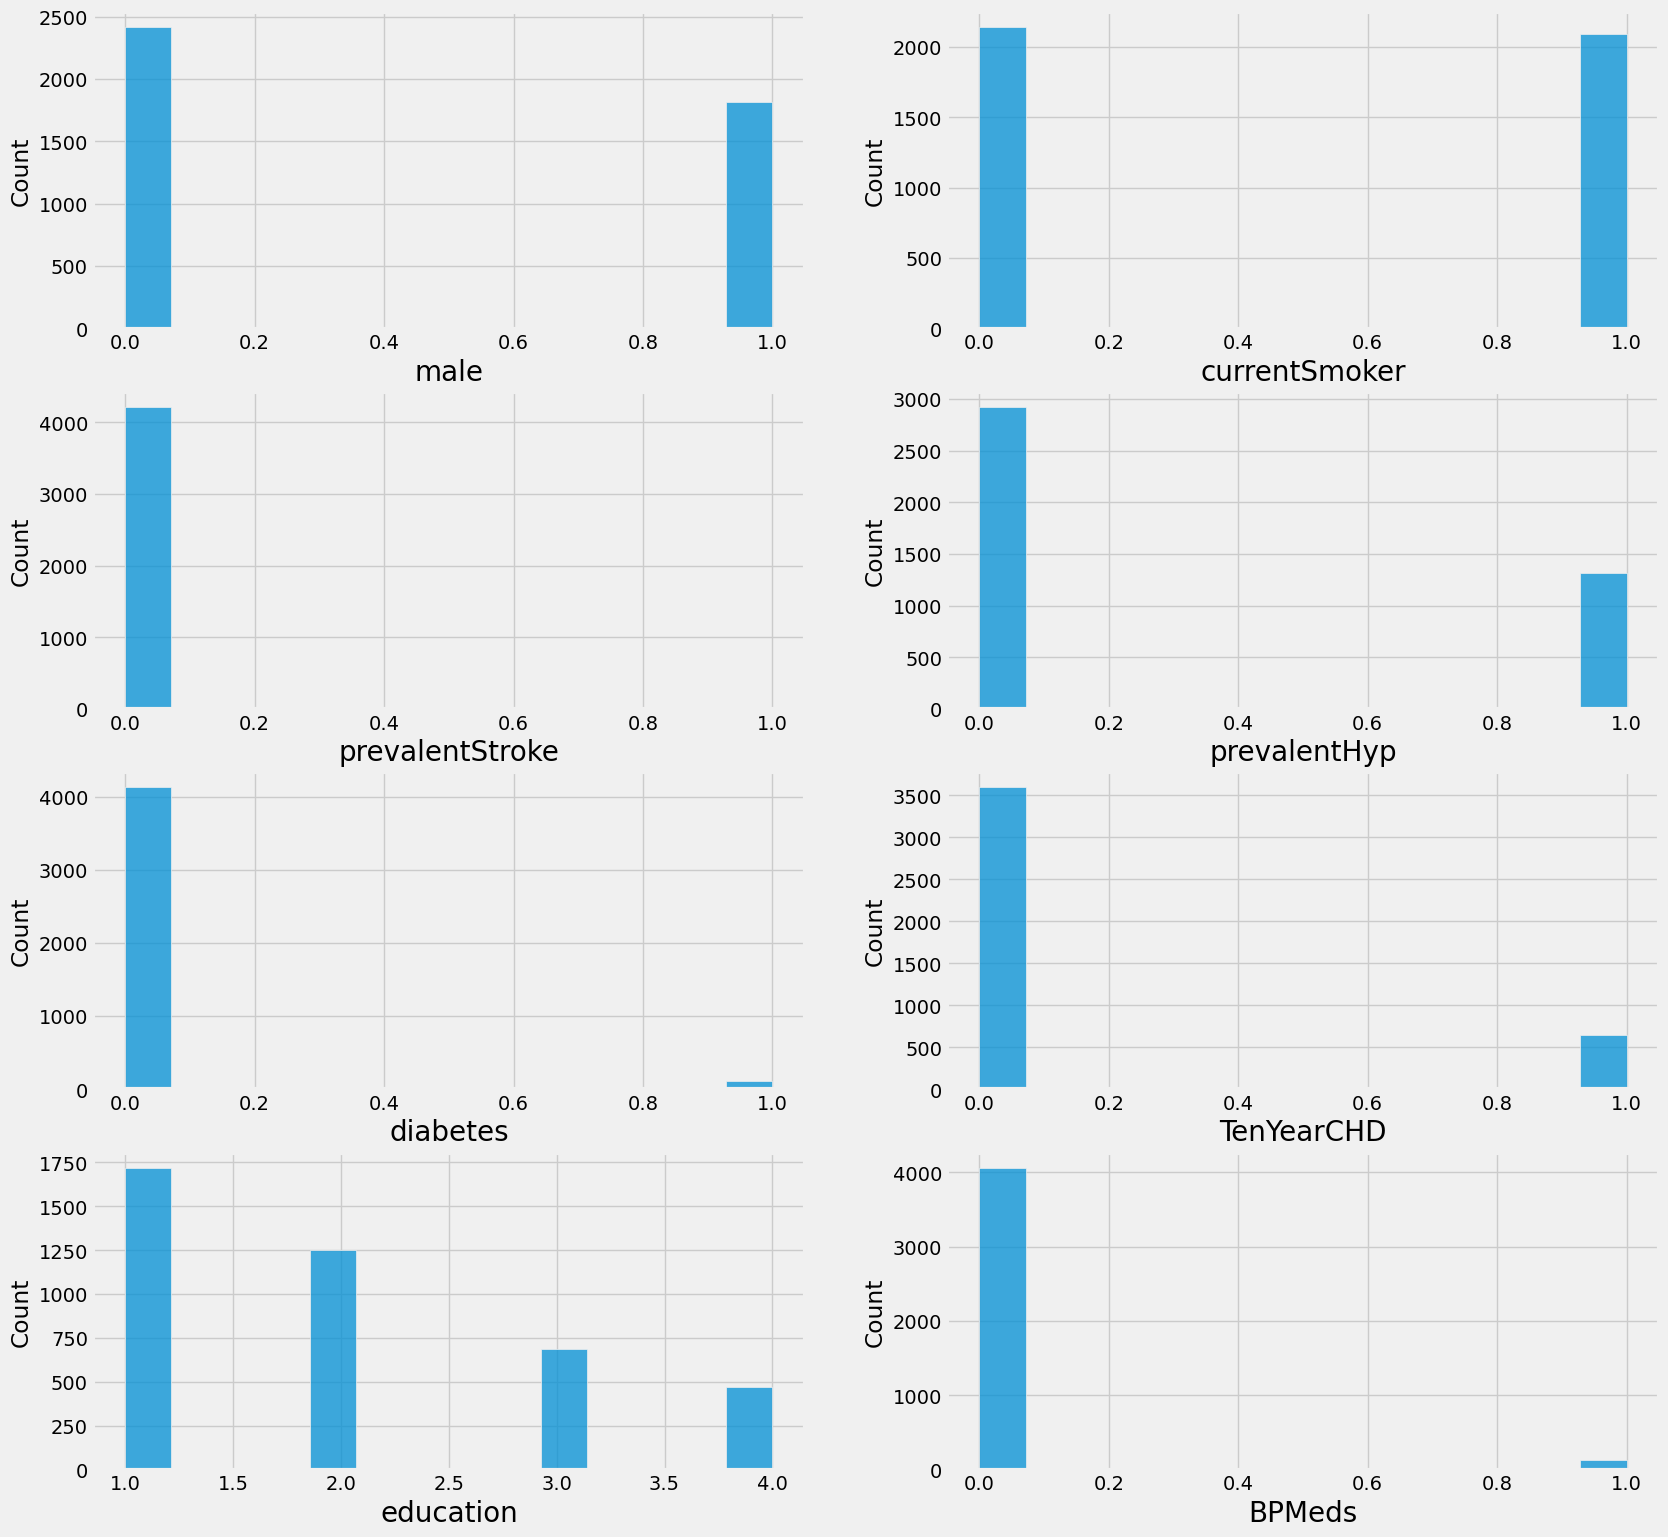

In [130]:
plt.figure(figsize=(18,18))
for i, feature in enumerate(cat_features):
    if i <= 8:
        ax = plt.subplot(4,2,i+1)
        sns.histplot(df[feature])
        plt.xlabel(feature,fontsize = 20)
plt.show()


- BPmeds, prevalentStroke et diabete sont fortement déséquilibrés.
- Il existe quatre niveaux d'éducation alors que les autres caractéristiques catégorielles sont toutes binaires.
- Le nombre de fumeurs et de non-fumeurs dans currentSmoker est presque le même.

### Variables numeriques

In [131]:
cont_features

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

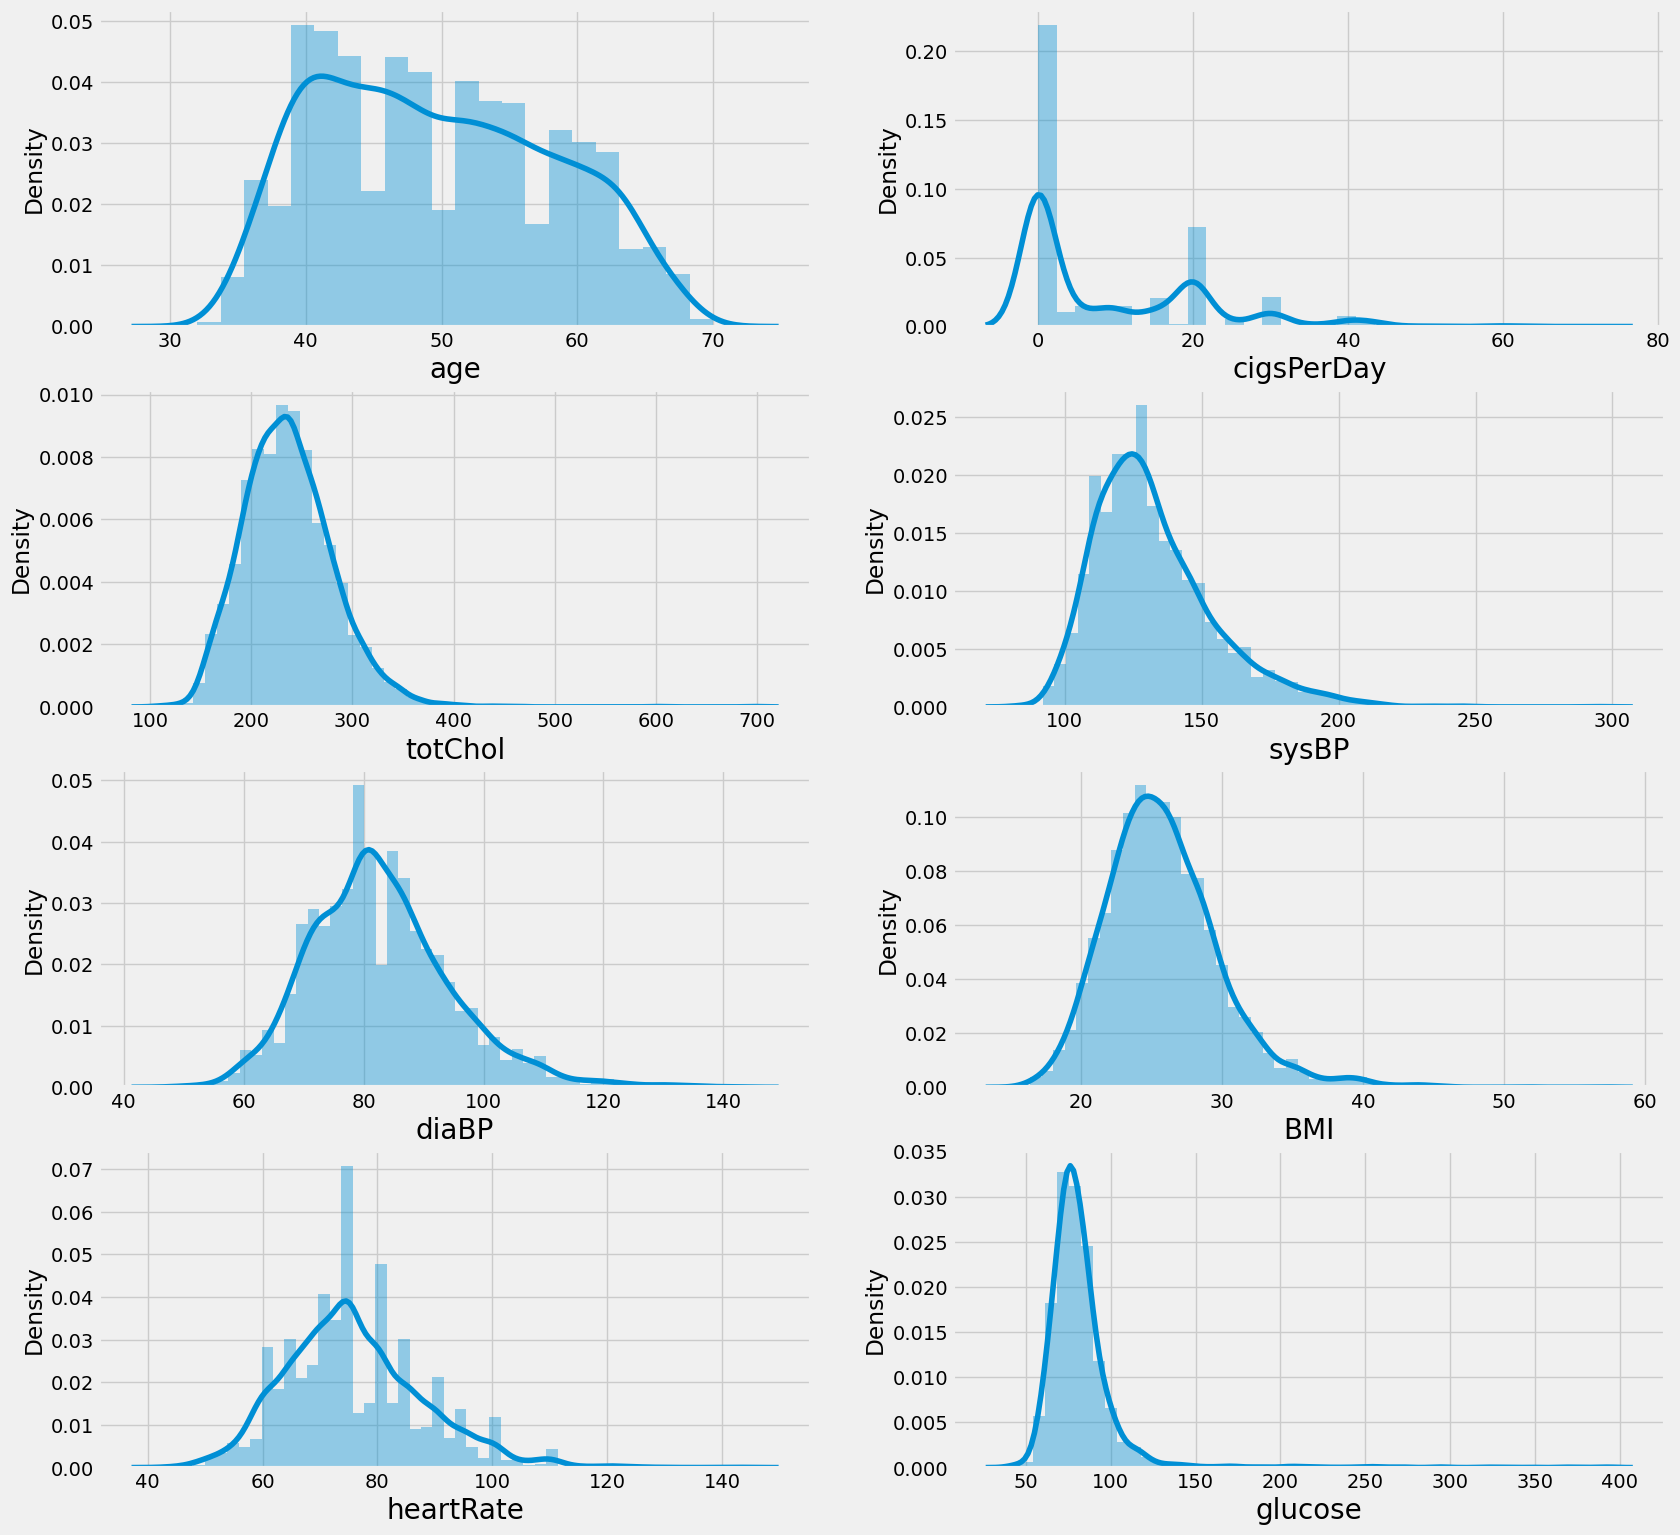

In [132]:
plt.figure(figsize=(18,18))
for i, feature in enumerate(cont_features):
    if i <= 8:
        ax = plt.subplot(4,2,i+1)
        sns.distplot(df[feature])
        plt.xlabel(feature,fontsize = 20)

plt.show()

- cigsPerDay a une distribution très irrégulière avec le plus de données présentes dans 0.
- cigsPerDay et sysBP présentent respectivement une forte et une légère assymétrie à droite.

### Corrélation

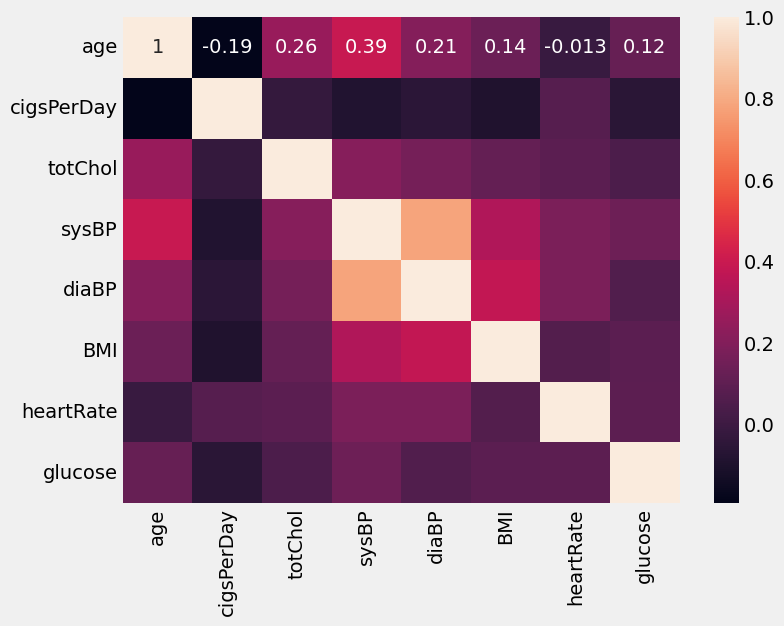

In [133]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[cont_features].corr(), annot=True, cbar=True) #
plt.show()

<Figure size 1800x1800 with 0 Axes>

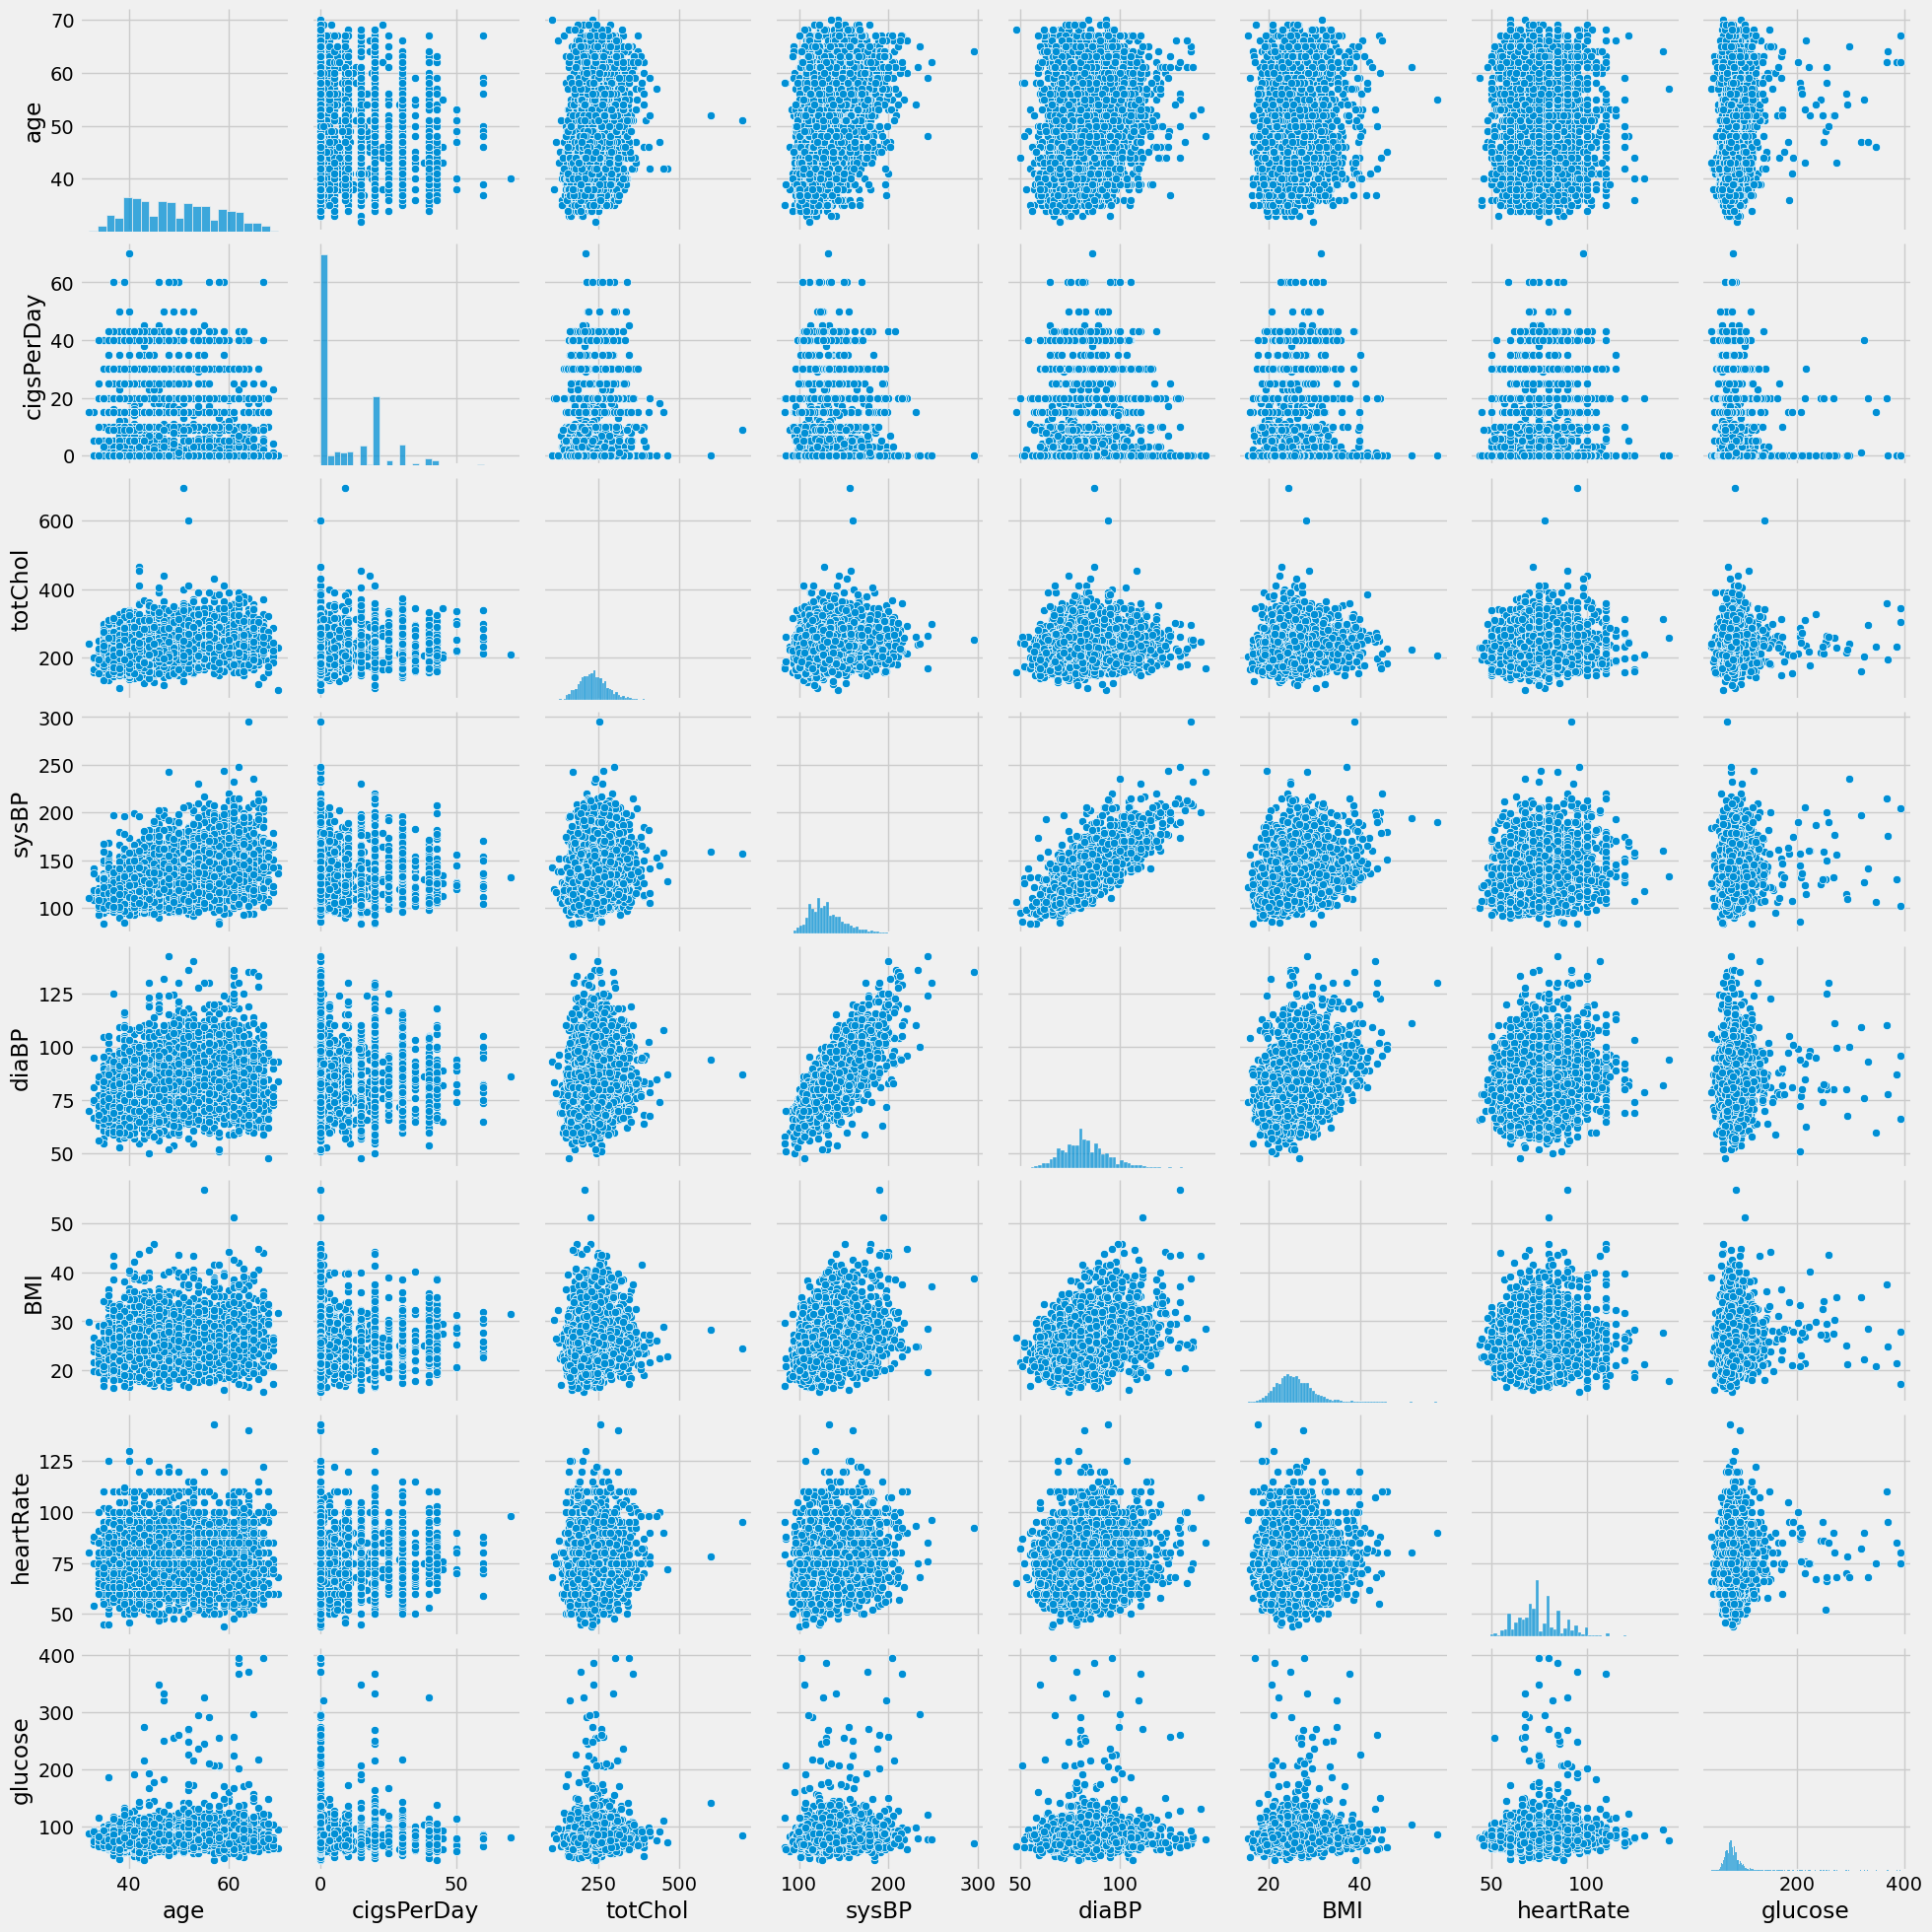

In [134]:
plt.figure(figsize=(18,18))
sns.pairplot(df[cont_features])
plt.show();

## Analyse bivariée

In [135]:
# Relation entre education et cigsPerDay

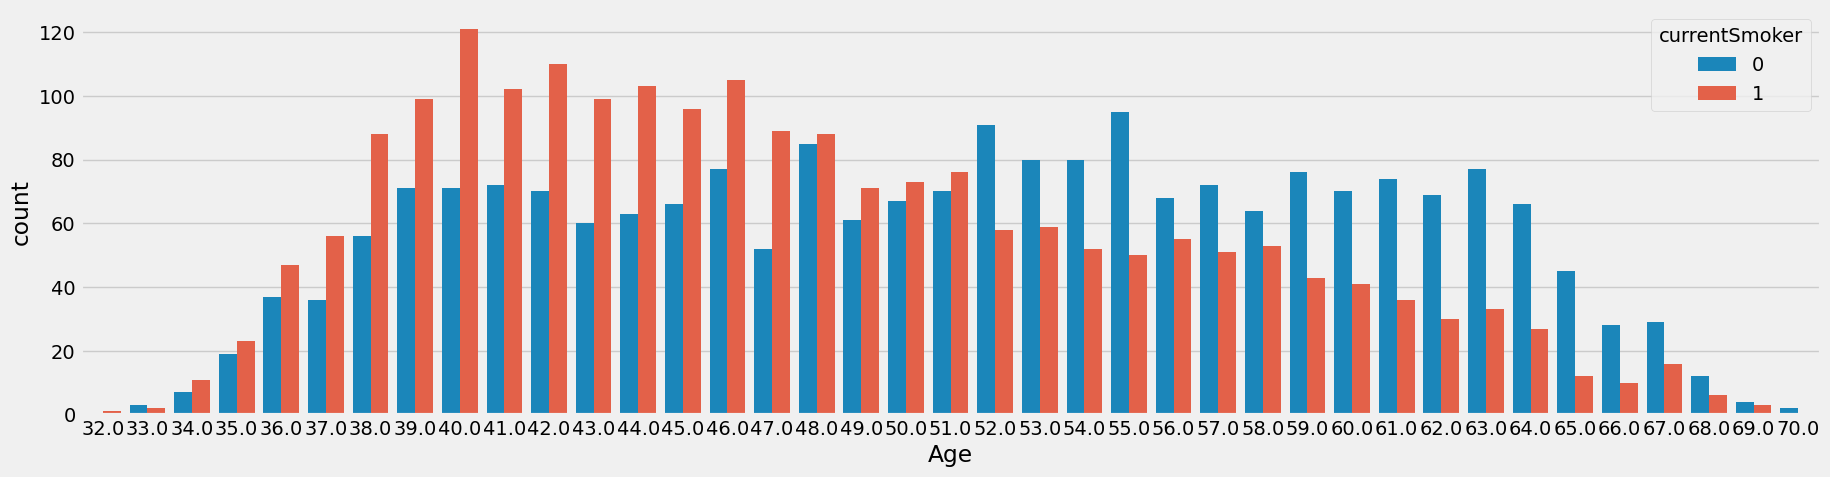

In [136]:
# Quel groupe d'age a plus de fumeurs
plt.figure(figsize=(20,5))

df['currentSmoker'] = df['currentSmoker'].astype(str)

sns.countplot(x='age', data=df, hue='currentSmoker')
plt.xlabel("Age")
plt.show()

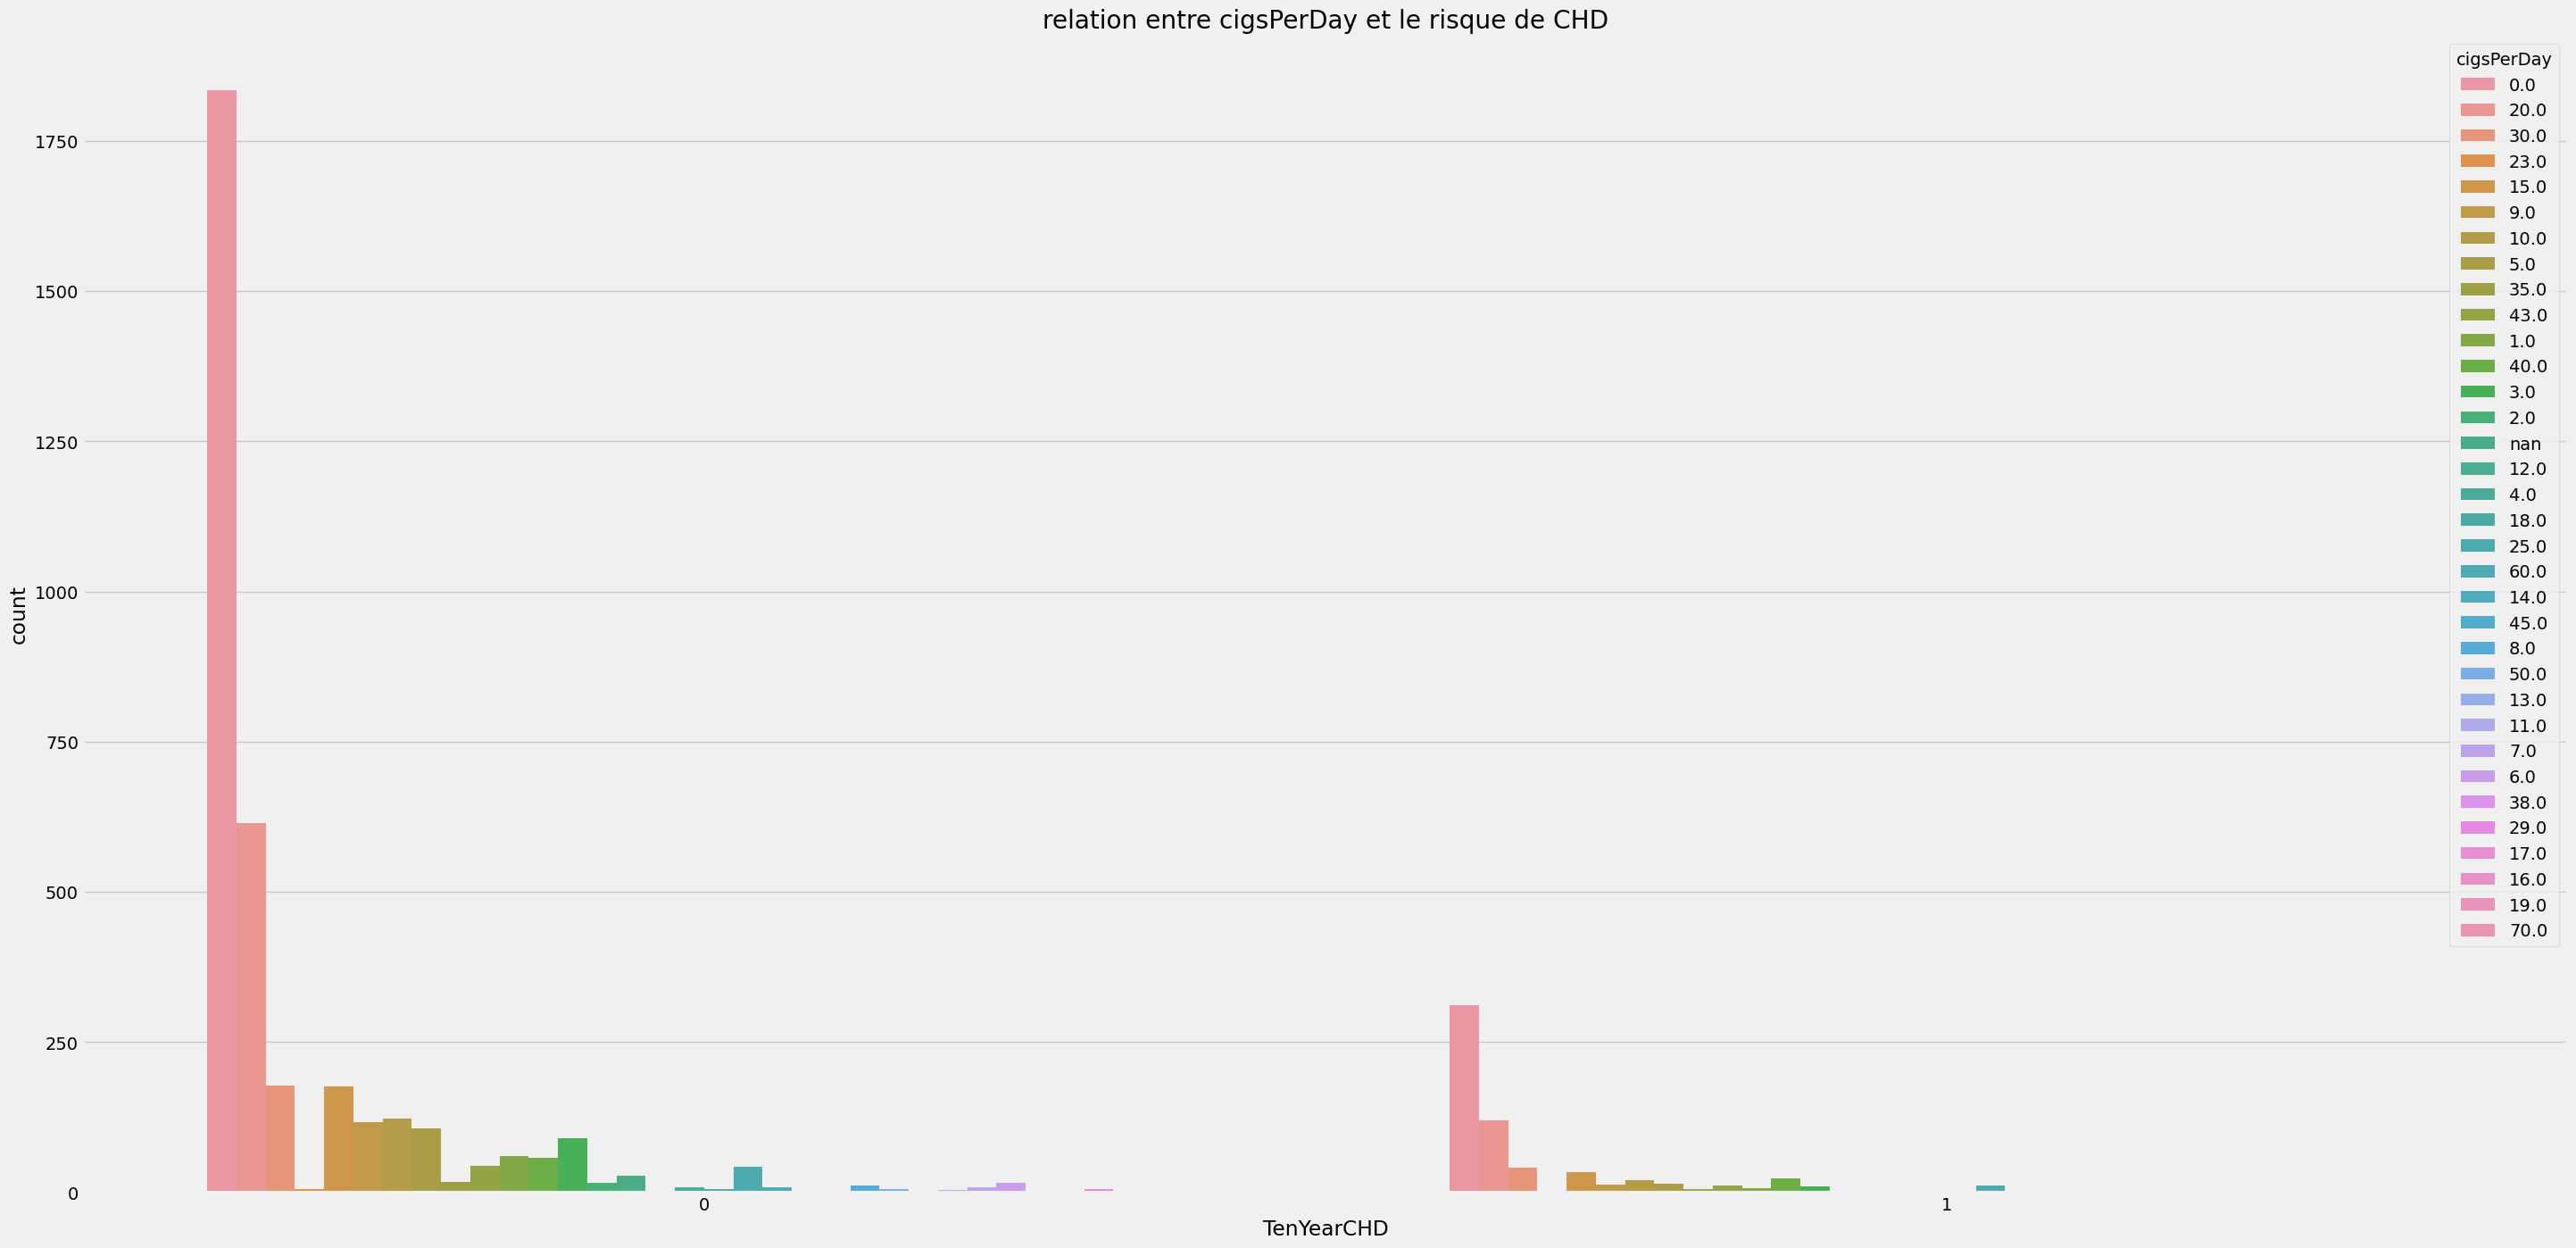

In [137]:
## Relation entre cigsPerDay et le risque de CHD
plt.figure(figsize=(32,16))

df['cigsPerDay'] = df['cigsPerDay'].astype(str)

sns.countplot(x='TenYearCHD', data=df, hue='cigsPerDay')
plt.title("relation entre cigsPerDay et le risque de CHD")
plt.show()

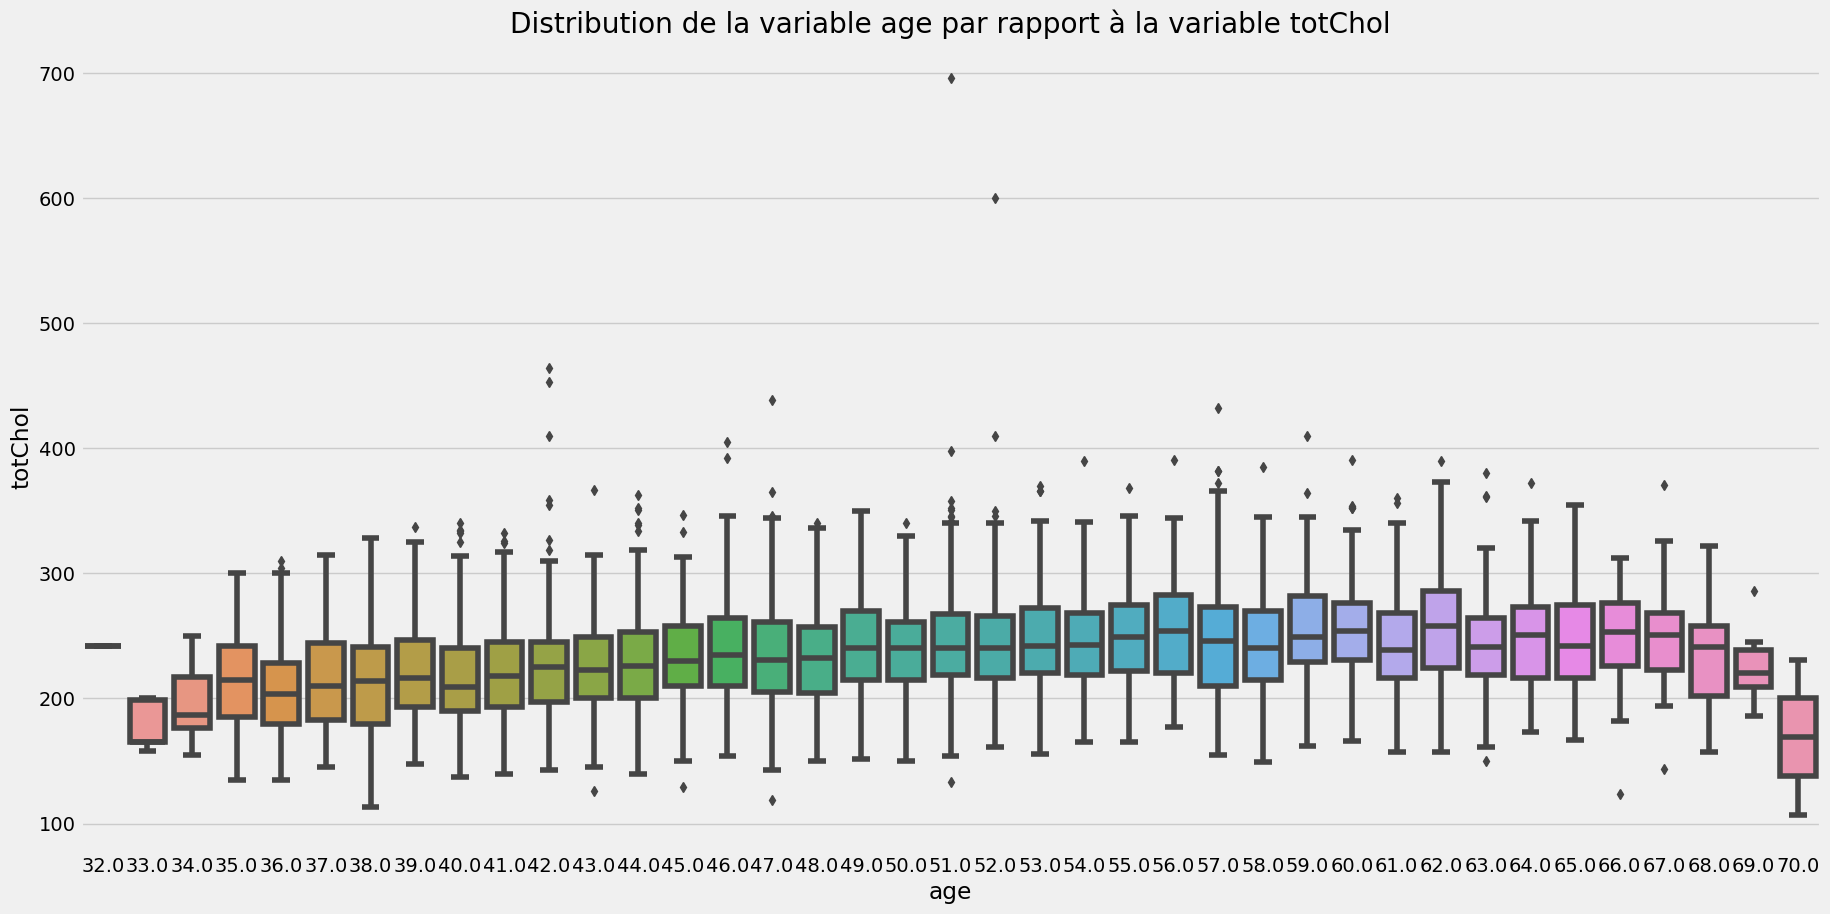

In [138]:
# Relation entre afge et totchol
plt.figure(figsize=(20,10))
sns.boxplot(x='age', y='totChol', data=df)
plt.title("Distribution de la variable age par rapport à la variable totChol")
plt.show()

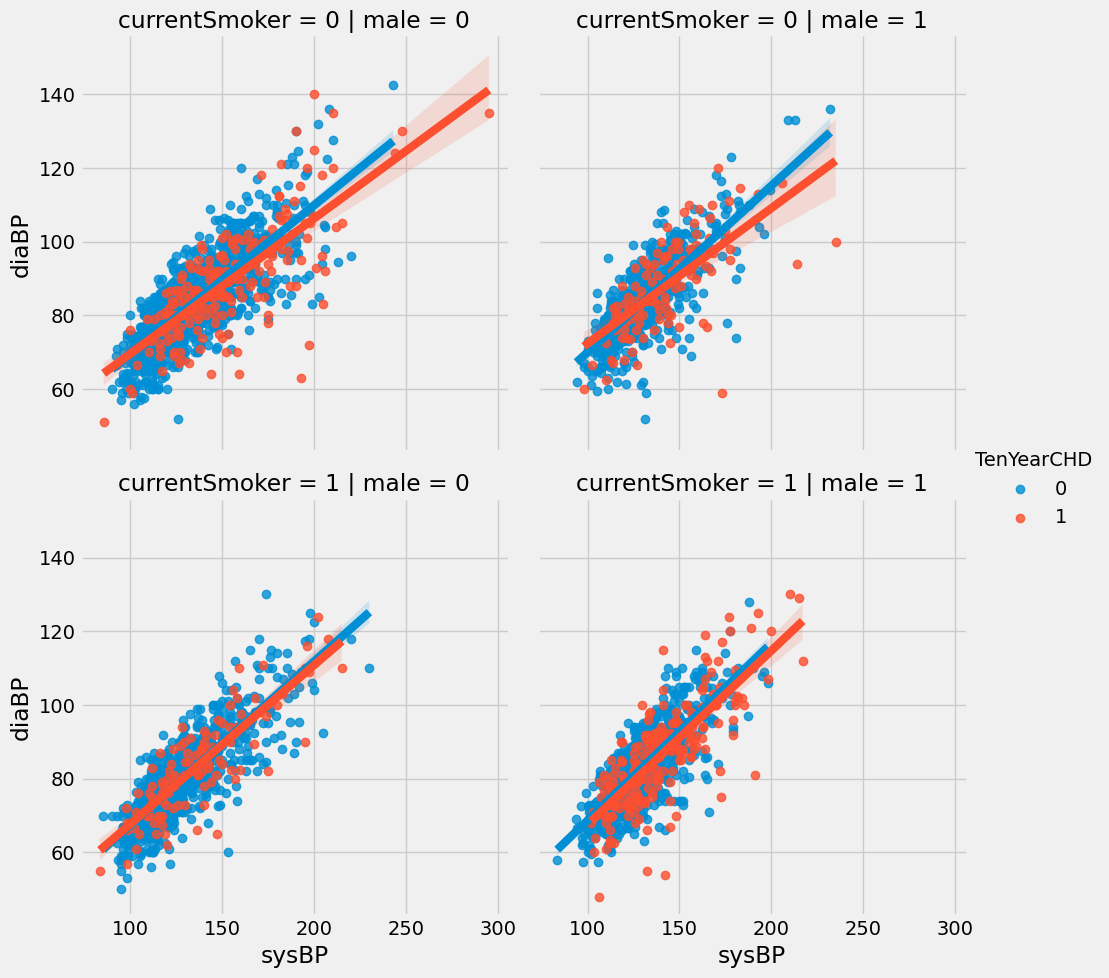

In [139]:
# Distribution de sysBP versus diabBP par rapport aux variables curentSmoker et sex
sns.lmplot(data=df, x='sysBP', y='diaBP', hue='TenYearCHD', col='male', row='currentSmoker')
plt.show()

# Pré-traitement

## Données manquantes

In [140]:
miss_rates = (df.isna().sum() / df.shape[0])
miss_rates.sort_values(ascending=False)

glucose            0.091509
education          0.024764
BPMeds             0.012500
totChol            0.011792
BMI                0.004481
heartRate          0.000236
male               0.000000
age                0.000000
currentSmoker      0.000000
cigsPerDay         0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
dtype: float64

In [141]:
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
cigsPerDay           0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

Pour détecter des motifs remarquables dans les valeurs manquantes, nous pouvons utiliser la libraire nommée **missingno**. Elle perme de visualiser des zones dans lesquelles se regroupent les valeurs manquantes.

In [142]:
# Installer la librairie missingno en décommentant et executant la ligne de code suivante dans le jupyter notebook
# !pip install missingno

In [143]:
import missingno as msno
# msno.matrix(df)


Avec pandas, nous pouvons demander la production d'un histogramme des valeurs manquantes avec leur nombre.

<Axes: >

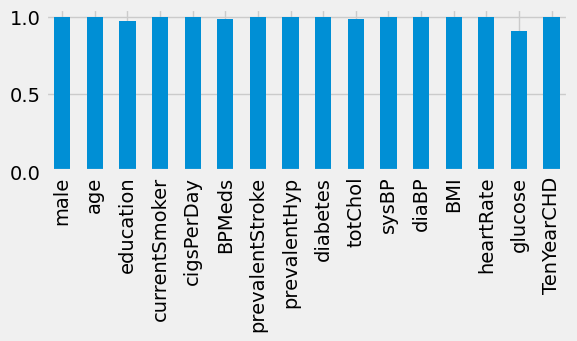

In [144]:
fig, ax = plt.subplots(figsize=(6, 2))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

Nous pouvons obtenir le même histogramme avec la librairie missingno:

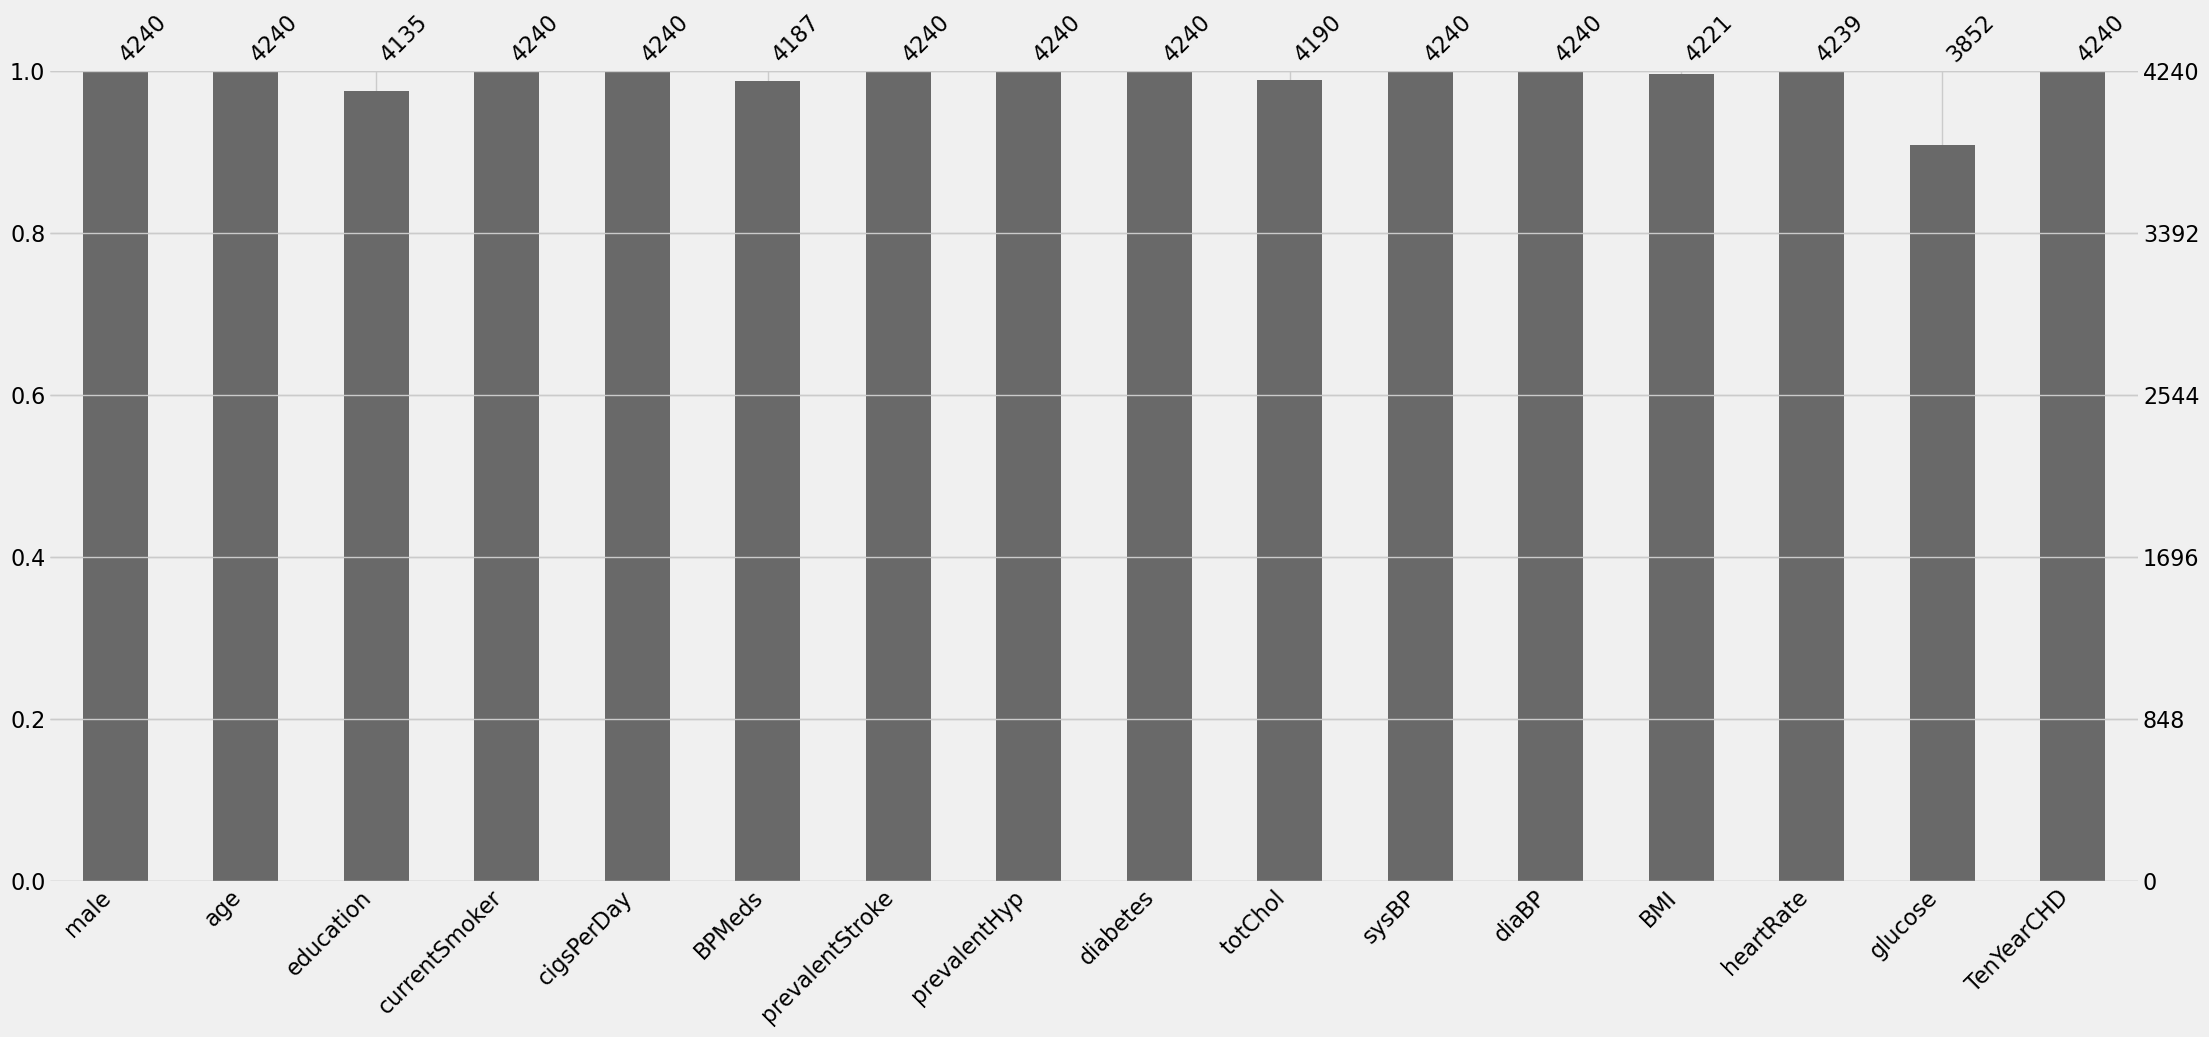

In [145]:
ax = msno.bar(df)

## Séparation en données train et test

Puisque les données sont déséquilibrées, la méthode train_test_split du Scikit-Learn a une option `stratify` qui permet de mélanger les données train et test selon la variable cible pour éviter qu'on trouve une seule catégorie de la variable cible dans train ou test.

In [146]:
random_state = 7
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_state, stratify=df['TenYearCHD'])
df_train.shape, df_test.shape

((3392, 16), (848, 16))

In [147]:
# On vérifie l'existence de deux modalités dans le train et le test
print("Le nombre de modalité 0 dans train est: %s" %(df_train['TenYearCHD'] == 0).sum())
print("Le nombre de modalité 1 dans train est: %s" %(df_train['TenYearCHD'] == 1).sum())

print("Le nombre de modalité 0 dans test est: %s" %(df_test['TenYearCHD'] == 0).sum())
print("Le nombre de modalité 1 dans test est: %s" %(df_test['TenYearCHD'] == 1).sum())


Le nombre de modalité 0 dans train est: 2877
Le nombre de modalité 1 dans train est: 515
Le nombre de modalité 0 dans test est: 719
Le nombre de modalité 1 dans test est: 129


In [148]:
df_train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3705,1,43.0,1.0,1,40.0,0.0,0,1,0,212.0,135.0,86.0,30.22,100.0,75.0,0
4232,1,68.0,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4090,1,51.0,1.0,0,0.0,0.0,0,1,0,220.0,151.0,87.5,22.01,80.0,86.0,0
4156,0,38.0,4.0,0,0.0,0.0,0,0,0,227.0,99.0,62.0,27.16,75.0,90.0,0
281,0,60.0,3.0,0,0.0,0.0,0,0,0,325.0,123.0,79.0,25.82,63.0,85.0,0


In [149]:
cont_features

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [150]:
cat_features

Index(['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'TenYearCHD', 'education', 'BPMeds'],
      dtype='object')

In [151]:
len(cont_features), len(cat_features)

(8, 8)

In [152]:
x = np.linspace(0, 1, 10)
x.shape

(10,)

In [153]:
x_r = x.reshape(-1, 1)
x_r.shape

(10, 1)

In [154]:
imput_cont = SimpleImputer(missing_values=np.nan, strategy='mean')
imput_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for feature in cont_features :
    df_train[feature] = imput_cont.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
    df_test[feature] = imput_cont.transform(df_test[feature].values.reshape(-1,1)).ravel()
    
for feature in cat_features :
    df_train[feature] = imput_cat.fit_transform(df_train[feature].values.reshape(-1,1)).ravel()
    df_test[feature] = imput_cat.transform(df_test[feature].values.reshape(-1,1)).ravel()

## Outliers

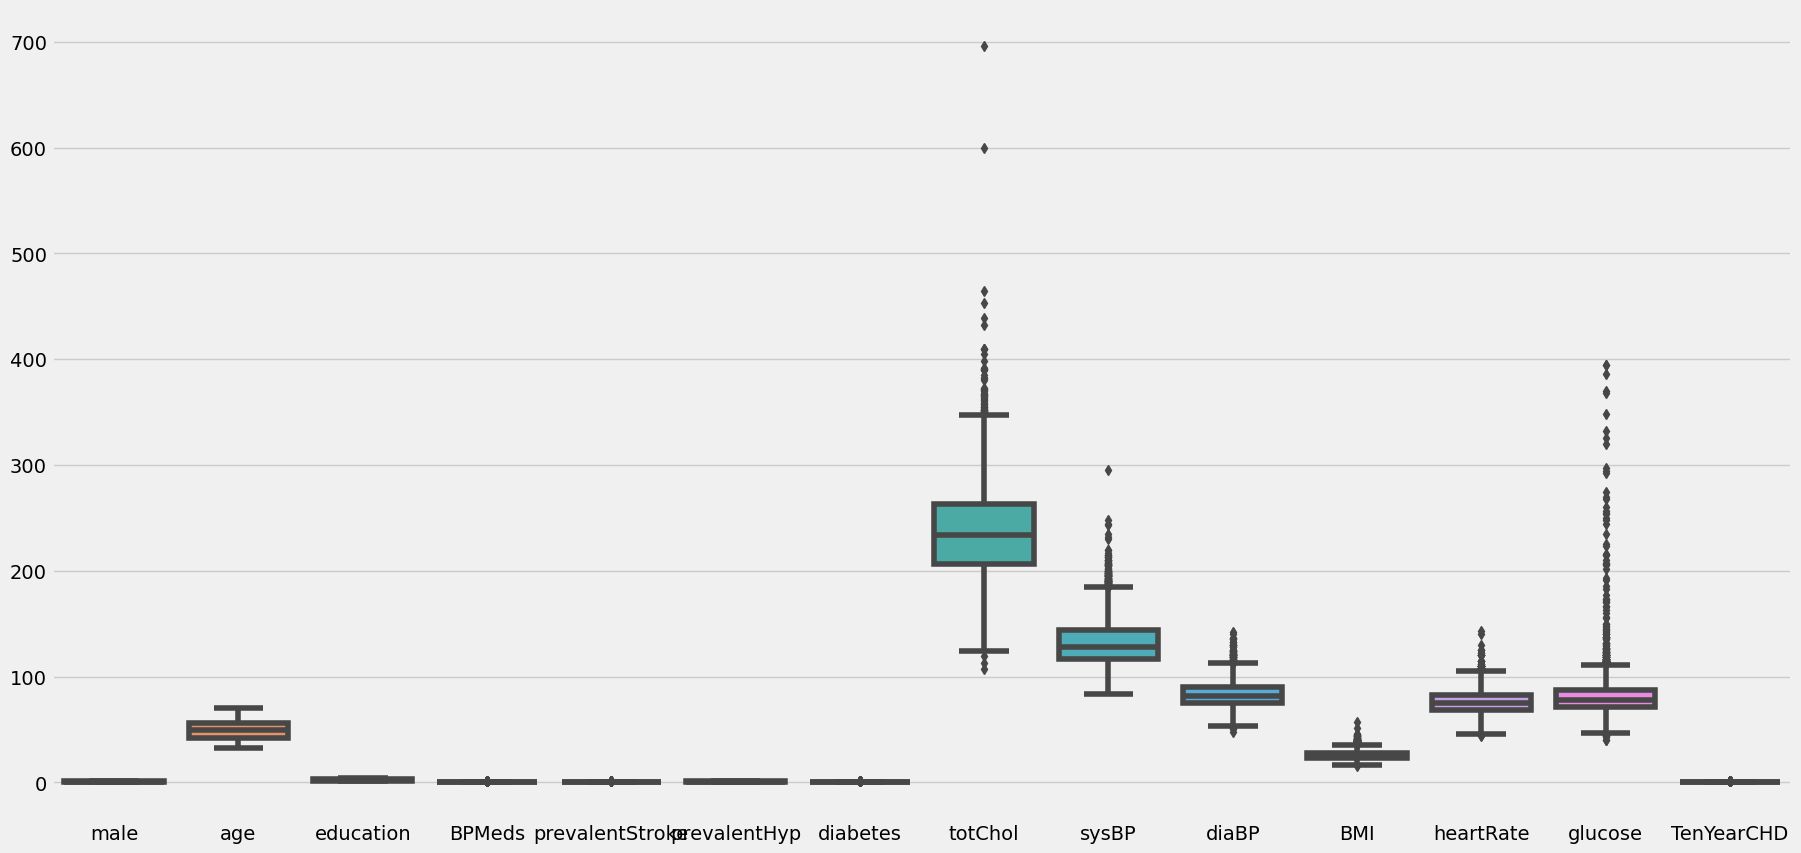

In [155]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

In [156]:
df['totChol'].max()

696.0

In [157]:
df['sysBP'].max()

295.0

In [158]:
df_train = df_train[df_train['totChol'] < 600.]
df_train = df_train[df_train['sysBP'] < 295.]

#test
df_test = df_test[df_test['totChol'] < 600.]
df_test = df_test[df_test['sysBP'] < 295.]

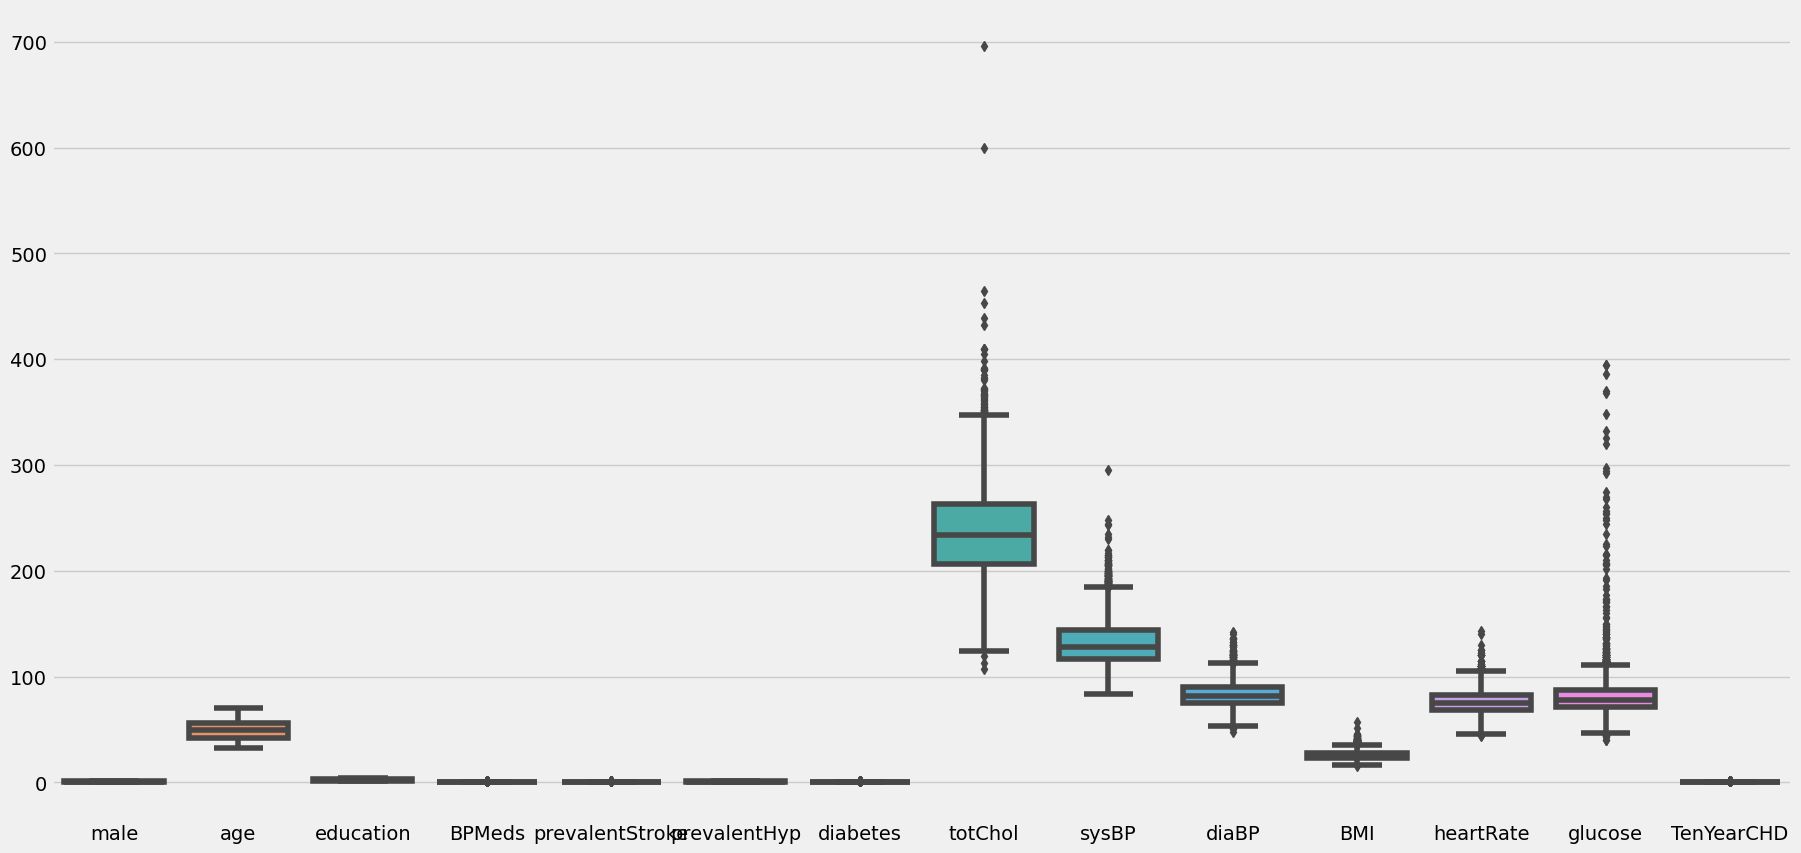

In [159]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.show()

## Sélection de variables

In [160]:
df_train_select = df_train.drop('TenYearCHD', axis=1)
target_train = df_train['TenYearCHD']

In [161]:
# Appliquer une sélection des variables et extraire 10 variables
select = SelectKBest(score_func=chi2, k=10)
z = select.fit_transform(df_train_select, target_train)

In [162]:
z.shape

(3390, 10)

In [163]:
selection_scores = pd.DataFrame(select.scores_)
data_columns = pd.DataFrame(df_train_select.columns)

In [164]:
# Concaténer les deux dataframes
scores = pd.concat([data_columns, selection_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

            Feature       Score
10            sysBP  577.846826
14          glucose  334.393601
1               age  249.090475
9           totChol  242.184453
4        cigsPerDay  195.616844
11            diaBP  112.578701
7      prevalentHyp   65.410542
8          diabetes   38.692277
5            BPMeds   24.845505
6   prevalentStroke   12.521787
0              male   10.763979


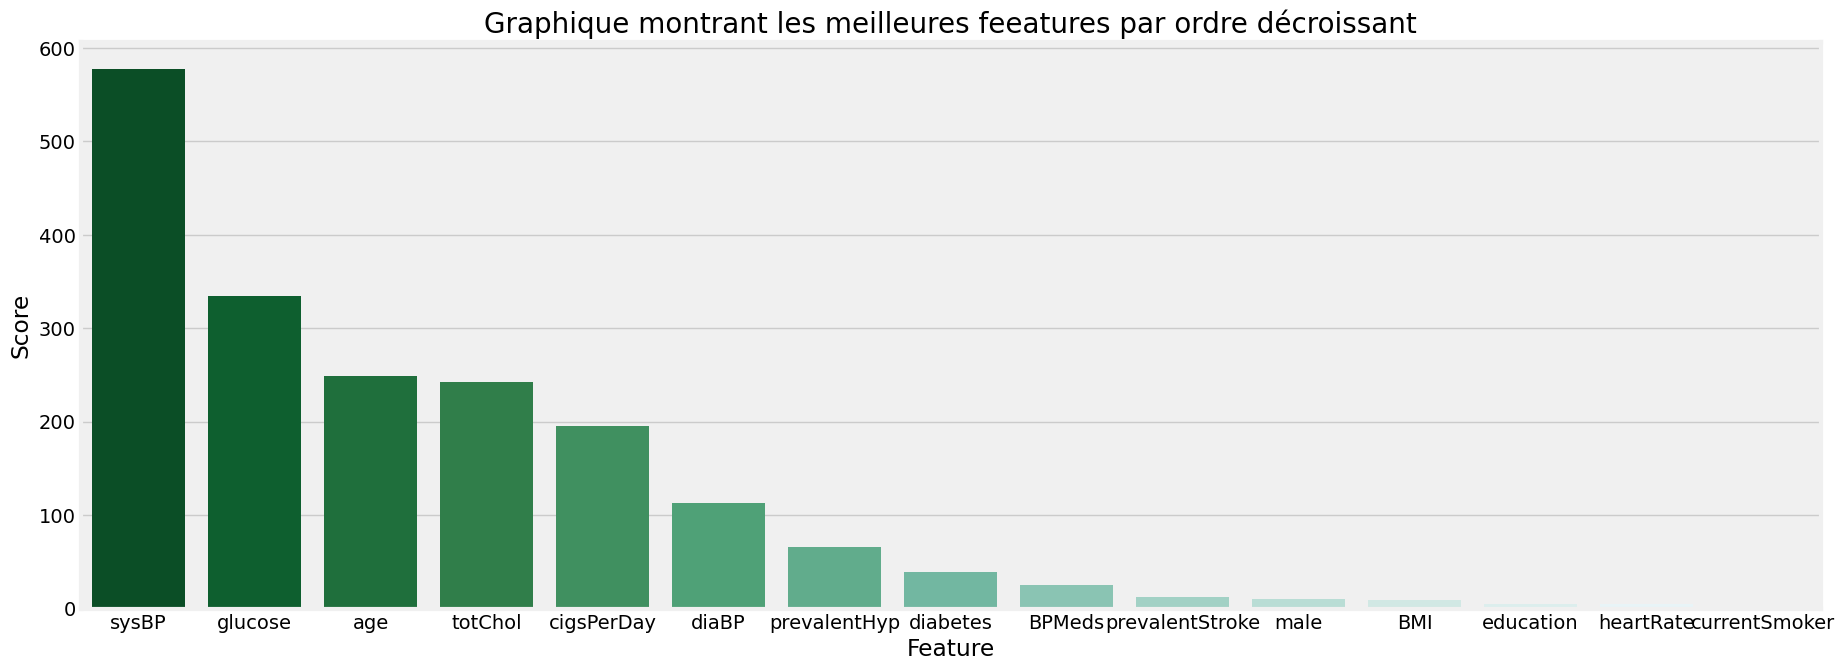

In [165]:
# Visualiser la sélection de variables
scores = scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Graphique montrant les meilleures feeatures par ordre décroissant", size=20)
plt.show()

In [166]:
df_train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [167]:
mask = select.get_support(indices=True)
feature_names = np.array(df_train.columns)

In [168]:
print("Toutes les features:")
print(feature_names)

Toutes les features:
['male' 'age' 'education' 'currentSmoker' 'cigsPerDay' 'BPMeds'
 'prevalentStroke' 'prevalentHyp' 'diabetes' 'totChol' 'sysBP' 'diaBP'
 'BMI' 'heartRate' 'glucose' 'TenYearCHD']


In [169]:
new_feature_names = df_train_select.columns[mask]

In [170]:
# Afficher les features sélectionnées
new_feature_names

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'glucose'],
      dtype='object')

In [171]:
# Reconstruire les ensembles train et test
df_train_select = df_train_select[new_feature_names]
df_test_select = df_test[new_feature_names]

In [172]:
cat_features 

Index(['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'TenYearCHD', 'education', 'BPMeds'],
      dtype='object')

In [173]:
new_feature_names

Index(['age', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'sysBP', 'diaBP', 'glucose'],
      dtype='object')

In [174]:
cat_select_features = [feature for feature in cat_features if feature in new_feature_names]
cat_select_features

['prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds']

In [175]:
cat_select_features = [feature for feature in cat_features if feature in new_feature_names]

cat_select_features = pd.Index(cat_select_features)
cat_select_features

Index(['prevalentStroke', 'prevalentHyp', 'diabetes', 'BPMeds'], dtype='object')

In [176]:
cont_select_features = [feature for feature in cont_features if feature in new_feature_names]

cont_select_features = pd.Index(cont_select_features)
cont_select_features

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'glucose'], dtype='object')

## Normalisation

In [177]:
scale_standard = StandardScaler()
scale_minmax = MinMaxScaler()
scale_robust = RobustScaler()


for feature in cont_select_features:
    # Normaliser les données d'entrainement
    df_train_select[feature] = scale_standard.fit_transform(df_train_select[feature].values.reshape(-1,1))
    df_train_select[feature] = df_train_select[feature].ravel()
    # Normaliser les données 
    df_test_select[feature] = scale_standard.transform(df_test_select[feature].values.reshape(-1,1))
    df_test_select[feature] = df_test_select[feature].ravel()

In [178]:
X_train = df_train_select.values
X_test = df_test_select.values

y_train = df_train['TenYearCHD'].values
y_test = df_test['TenYearCHD'].values

# Modélisation

- Model 1: Régression logistique 
- Model 2: Régression logistique + Ridge
- Model 3: Régression logistique + Lasso
- Model 4: Régression logistique + Elastic Net

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [179]:
# Modèles
logreg = LogisticRegression(penalty='none', tol=10e-6, random_state=7)
logregRidge = LogisticRegression(C=0.1, penalty='l2', tol=10e-6, random_state=7)
logregLasso = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', tol=10e-6, random_state=7)
logregElasticNet = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.7, tol=10e-6, random_state=7)

In [180]:
dict_models = {
    "Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
                }

In [200]:
precision = 9 / (9 + 5)
recall = 9 / (119 +9) 
precision, recall, 

(0.6428571428571429, 0.0703125, 0.5555555555555556)

In [202]:
714 / (714 + 119)

0.8571428571428571

Régression logistique

Matrice de confusion:
[[714   5]
 [119   9]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       719
           1       0.64      0.07      0.13       128

    accuracy                           0.85       847
   macro avg       0.75      0.53      0.52       847
weighted avg       0.82      0.85      0.80       847
 

Exactitude: 85.360094 



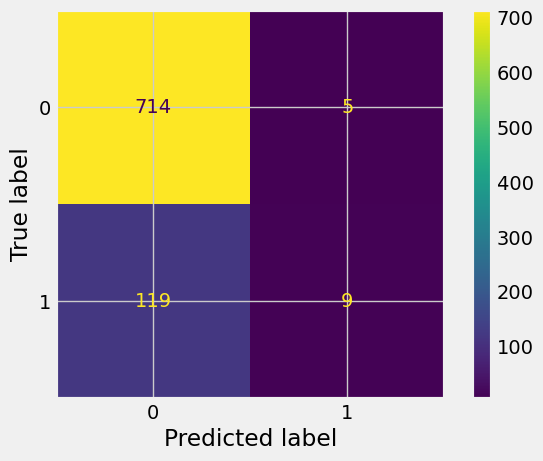

In [182]:
## Régression logistique
# logreg.fit(X_train_up, y_train_up)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix) 
disp.plot() 
plt.show()

###### Précision et recall de chaque classe

Scikit-Learn calcule la précision, le recall, et le score F1 pour chaque classe. Nous signalons que les termes des TP, TN, FP, et FN sont appliqués pour chaque classe. 
La précision de la calsse "non TenCHD" que l'on désigné par la classe "0" est définie par :
\begin{equation*}
\text{Précision (non TenCHD)} = \frac{\text{FP (non TenCHD)}}{\text{FP (non TenCHD) + FP (non TenCHD)}},
\end{equation*}

\begin{equation*}
\text{Recall (non TenCHD)} = \frac{\text{FP (non TenCHD)}}{\text{FP (non TenCHD) + FN (non TenCHD)}}.
\end{equation*}

De la même façon, on définit :

\begin{equation*}
\text{Précision (TenCHD)} = \frac{\text{FP (TenCHD)}}{\text{FP (TenCHD) + FP (TenCHD)}},
\end{equation*}

\begin{equation*}
\text{Recall (TenCHD)} = \frac{\text{FP (TenCHD)}}{\text{FP (TenCHD) + FN (TenCHD)}}.
\end{equation*}

In [4]:
# Vérficiation 
precision_class_nonTenCHD = 714 / (714 + 119)

recall_class_nonTenCHD = 714 / (714 + 5)


precision_class_TenCHD = 9 / (9 + 5)

recall_class_TenCHD = 9/(9+119)

print("Précision de la classe nonTenCHD est :", precision_class_nonTenCHD)
print("Recall de la classe nonTenCHD est :", recall_class_nonTenCHD)
print("Précision de la classe nonTenCHD est :", precision_class_TenCHD)
print("Recall de la classe nonTenCHD est :", recall_class_TenCHD)

Précision de la classe nonTenCHD est : 0.8571428571428571
Recall de la classe nonTenCHD est : 0.9930458970792768
Précision de la classe nonTenCHD est : 0.6428571428571429
Recall de la classe nonTenCHD est : 0.0703125


Régression logistique + Ridge

Matrice de confusion:
[[715   4]
 [122   6]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.60      0.05      0.09       128

    accuracy                           0.85       847
   macro avg       0.73      0.52      0.50       847
weighted avg       0.82      0.85      0.79       847
 

Exactitude: 85.123967 



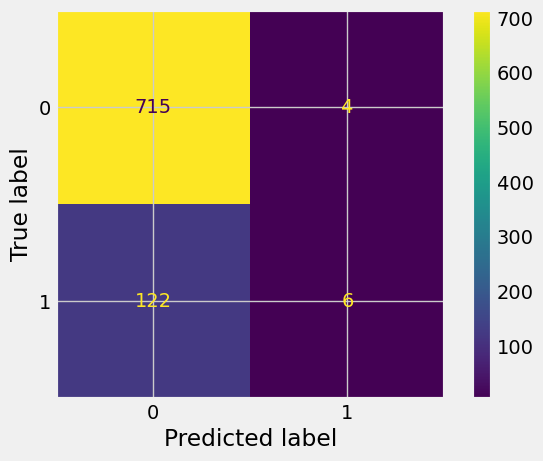

In [74]:
## régression logistique + ridge
logregRidge.fit(X_train, y_train)
y_pred = logregRidge.predict(X_test)

print('='*30)
print('Régression logistique + Ridge')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot() 
plt.show()

Régression logistique + Lasso

Matrice de confusion:
[[716   3]
 [123   5]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       0.62      0.04      0.07       128

    accuracy                           0.85       847
   macro avg       0.74      0.52      0.50       847
weighted avg       0.82      0.85      0.79       847
 

Exactitude: 85.123967 



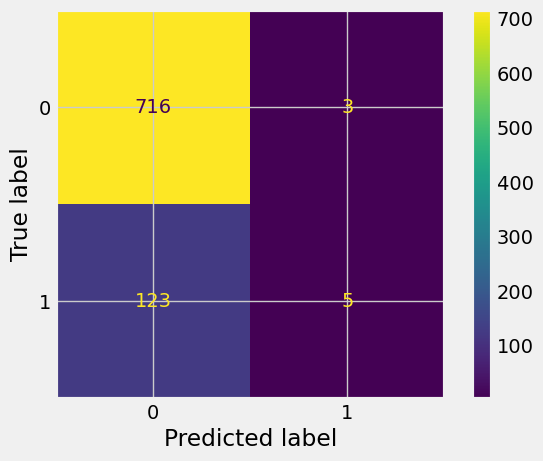

In [75]:
## régression logistique + Lasso
logregLasso.fit(X_train, y_train)
y_pred = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

Régression logistique + Elastic Net

Matrice de confusion:
[[715   4]
 [123   5]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       719
           1       0.56      0.04      0.07       128

    accuracy                           0.85       847
   macro avg       0.70      0.52      0.50       847
weighted avg       0.81      0.85      0.79       847
 

Exactitude: 85.005903 



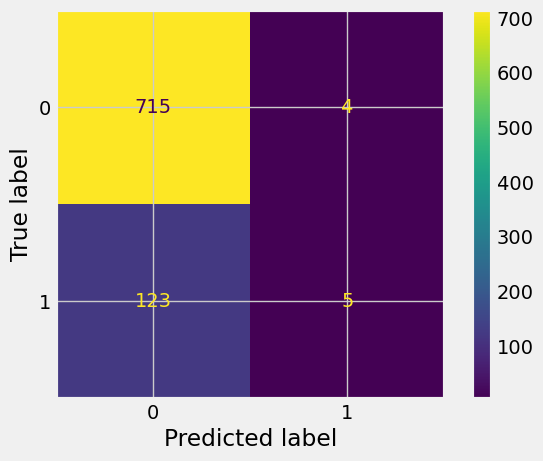

In [76]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train, y_train)
y_pred = logregElasticNet.predict(X_test)

print('='*35)
print('Régression logistique + Elastic Net')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

# Modélisation prédictive avec  sur-échantillonnage de la classe minoritaire

Lors du sur-échantillonnage de la classe minoritaire ou du sous-échantillonnage de la classe majoritaire il faut ajuster (fit) votre modèle de prédiction sur les données (sur (ou sous)-échantillonnées). L'évaluation se fait sur les données d'origine, c'est à dire:

1. Séparer vos données en X_train, y_train et X_test, y_test
2. Sur-échantillonner UNIQUEMENT sur X_train, y_train en utilsant SMOTE
    - X_train_up, y_train_up = SMOTE.fit_resample(X_train, y_train)
3. Ajuster votre modèle sur les donnnées X_train_up, y_train_up
    - model.fit(X_train_up, y_train_up)
4. Évaluer votre modèle sur les données d'apprentissage avant le sur-échantillonage X_train, y_train
    - score_train = model.score(X_train, y_train)
5. Calculer vos prédictions sur les X_test
    - y_pred = model.predict(X_test)
6. Évaluer votre modèle sur les données de test
    - score_test = model.score(X_test, y_test)

In [77]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=7)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

Régression logistique

Matrice de confusion:
[[471 248]
 [ 41  87]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       719
           1       0.26      0.68      0.38       128

    accuracy                           0.66       847
   macro avg       0.59      0.67      0.57       847
weighted avg       0.82      0.66      0.71       847
 

Exactitude: 65.879575 



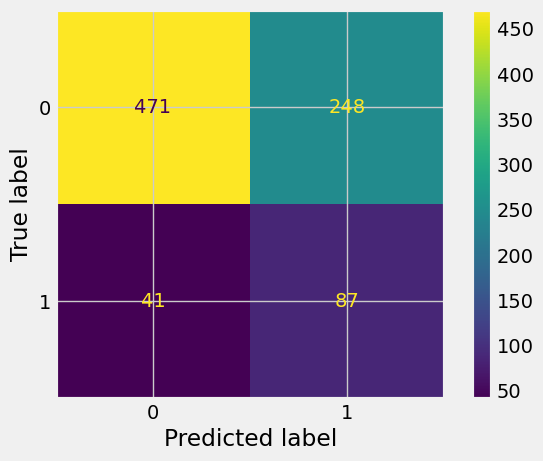

In [78]:
## Régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

Régression logistique + Ridge

Matrice de confusion:
[[473 246]
 [ 42  86]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       719
           1       0.26      0.67      0.37       128

    accuracy                           0.66       847
   macro avg       0.59      0.66      0.57       847
weighted avg       0.82      0.66      0.71       847
 

Exactitude: 65.997639 



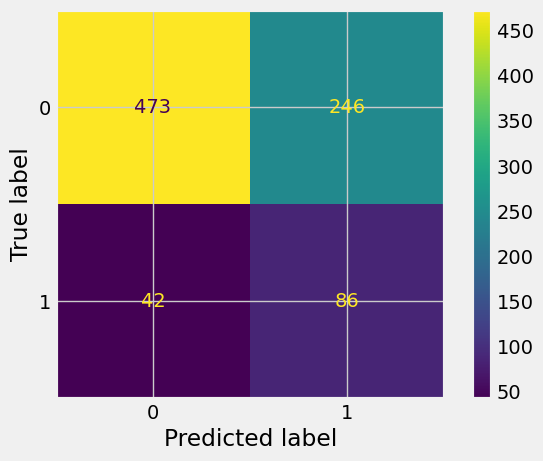

In [79]:
## régression logistique + ridge
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)

print('='*30)
print('Régression logistique + Ridge')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

Régression logistique + Lasso

Matrice de confusion:
[[475 244]
 [ 41  87]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       719
           1       0.26      0.68      0.38       128

    accuracy                           0.66       847
   macro avg       0.59      0.67      0.57       847
weighted avg       0.82      0.66      0.71       847
 

Exactitude: 66.351830 



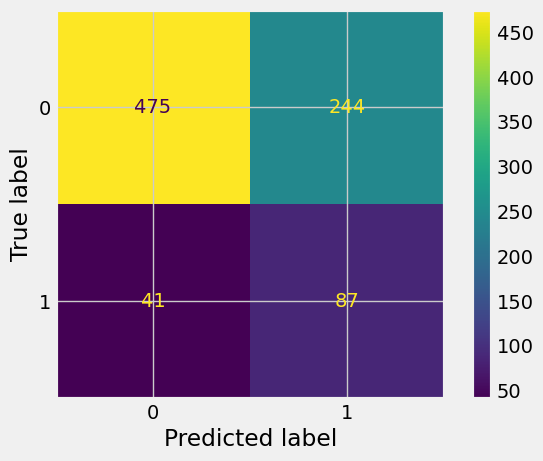

In [80]:
## régression logistique + Lasso
logregLasso.fit(X_train_up, y_train_up)
y_pred = logregLasso.predict(X_test)

print('='*30)
print('Régression logistique + Lasso')
print('='*30, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

Régression logistique + Elastic Net

Matrice de confusion:
[[475 244]
 [ 42  86]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       719
           1       0.26      0.67      0.38       128

    accuracy                           0.66       847
   macro avg       0.59      0.67      0.57       847
weighted avg       0.82      0.66      0.71       847
 

Exactitude: 66.233766 



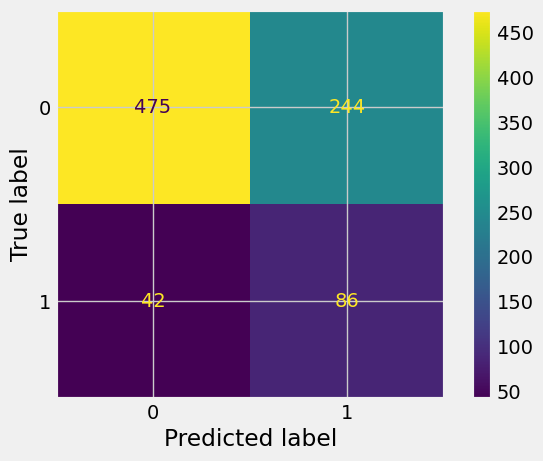

In [81]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train_up, y_train_up)
y_pred = logregElasticNet.predict(X_test)

print('='*35)
print('Régression logistique + Elastic Net')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

## Rappel (Sensibilité) et spécifité de la régréssion logistique

In [82]:
## régression logistique
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensibilite = TP / float(TP+FN)
specificite = TN / float(TN+FP)


In [83]:
print('Exactitude = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'Erreur de classification= 1- Exactitude= ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensibilité (True Positive Rate) = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificité (True Negative Rate) = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Précision (Positive Predictive value) = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n')

Exactitude = TP+TN/(TP+TN+FP+FN) =  0.6587957497048406 
 Erreur de classification= 1- Exactitude=  0.34120425029515944 
 Sensibilité (True Positive Rate) = TP/(TP+FN) =  0.6796875 
 Specificité (True Negative Rate) = TN/(TN+FP) =  0.655076495132128 
 Précision (Positive Predictive value) = TP/(TP+FP) =  0.25970149253731345 
 Negative predictive Value = TN/(TN+FN) =  0.919921875 



In [84]:
y_pred_prob = logreg.predict_proba(X_test)[:,:]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob absence de maladie (0)','Prob de maladie (1)'])
y_pred_prob_df.head()

,Prob absence de maladie (0),Prob de maladie (1)
0,0.595987,0.404013
1,0.290397,0.709603
2,0.605135,0.394865
3,0.491009,0.508991
4,0.444898,0.555102



Étant donné que le modèle prédit une maladie cardiaque, un trop grand nombre d'erreurs de type II n'est pas conseillé. Un faux négatif (ignorer la probabilité de maladie lorsqu'il en existe une) est plus dangereux qu'un faux positif dans ce cas. Par conséquent, pour augmenter la sensibilité, le seuil (0.5) peut être abaissé.

### Optimisation des hyper-paramètres avec Grid Search

In [85]:
logregLasso

LogisticRegression(C=0.1, penalty='l1', random_state=7, solver='liblinear',
                   tol=1e-05)

In [86]:
# help(GridSearchCV)

In [87]:
param_grid = {'C': [0.001, 0.01, 0.1, 1., 10.], 'max_iter': [100, 200, 300, 400]}
grid = GridSearchCV(logregLasso, param_grid, verbose=False, n_jobs=1, return_train_score=True, scoring='f1')
# attention n_jobs=-1 va utiliser tous les CPUs
grid.fit(X_train_up, y_train_up)

GridSearchCV(estimator=LogisticRegression(C=0.1, penalty='l1', random_state=7,
                                          solver='liblinear', tol=1e-05),
             n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 200, 300, 400]},
             return_train_score=True, scoring='f1', verbose=False)

In [88]:
grid.best_params_

{'C': 0.01, 'max_iter': 100}

In [89]:
grid_logreg = grid.best_estimator_


In [90]:
predictions = grid_logreg.fit(X_train_up, y_train_up)

In [91]:
grid_logreg.score(X_train, y_train)

0.6244837758112094

In [92]:
grid_logreg.score(X_test, y_test)

0.6399055489964581

Régression logistique

Matrice de confusion:
[[450 269]
 [ 36  92]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75       719
           1       0.25      0.72      0.38       128

    accuracy                           0.64       847
   macro avg       0.59      0.67      0.56       847
weighted avg       0.82      0.64      0.69       847
 

Exactitude: 63.990555 



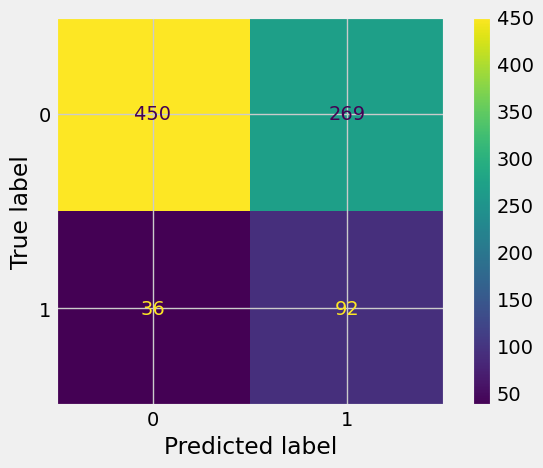

In [93]:
# performance de régression logistique avec GridSearchCV
y_pred = grid_logreg.predict(X_test)

print('='*20)
print('Régression logistique')
print('='*20, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

# Courbes de validation

### Régression Ridge

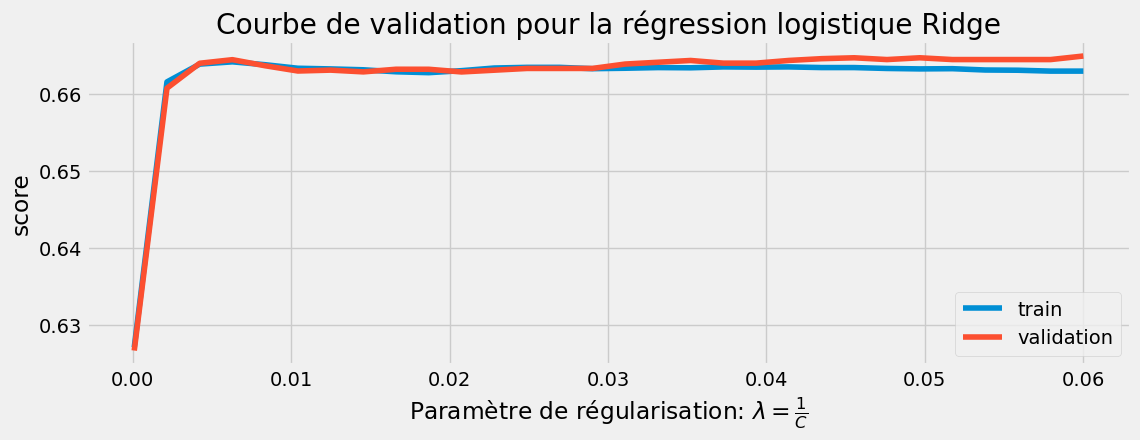

In [94]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
list_hyperparams = np.linspace(0.0001, 0.06, 30)

train_score, val_score = validation_curve(logregRidge, #LogisticRegression(), #logregRidge,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Ridge")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

### Régression Lasso

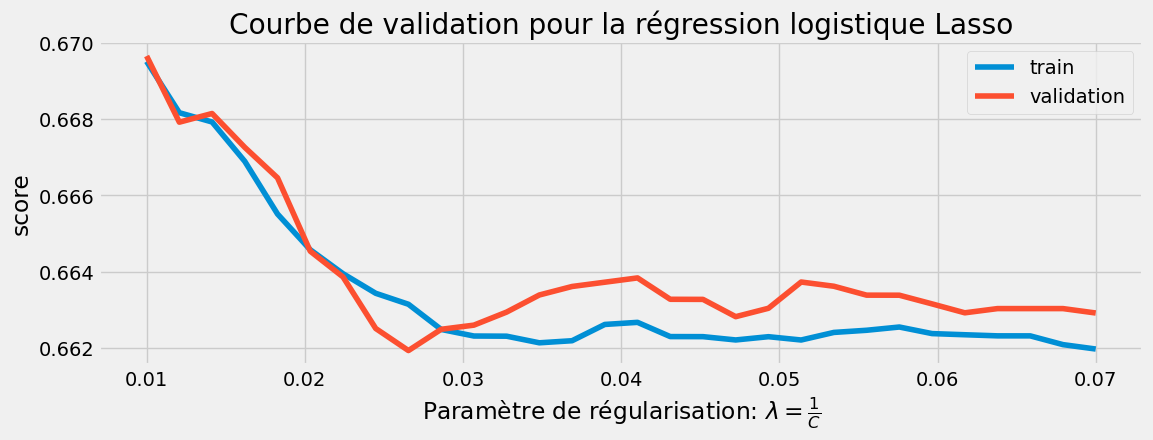

In [95]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
list_hyperparams = np.linspace(0.01, 0.07, 30)

train_score, val_score = validation_curve(logregLasso, 
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

    #N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               # cv=5, scoring='f1',
                                               #train_sizes=np.linspace(0.1, 1, 10))
    
    # plt.figure(figsize=(12,8))
    # plt.plot(N, train_score.mean(axis=1), label='train score')
    # plt.plot(N, val_score.mean(axis=1), label='validation score')

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Lasso")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

### Régression Elastic Net

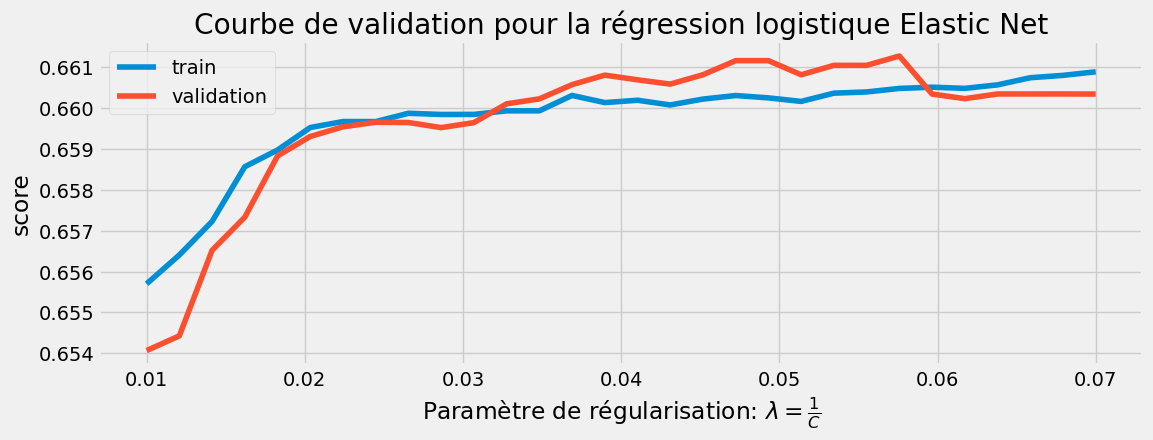

In [96]:
list_hyperparams = np.linspace(0.01, 0.07, 30)

train_score, val_score = validation_curve(logregElasticNet, 
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Elastic Net")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

In [97]:
logregElasticNet1 = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.9, tol=10e-6, random_state=7)

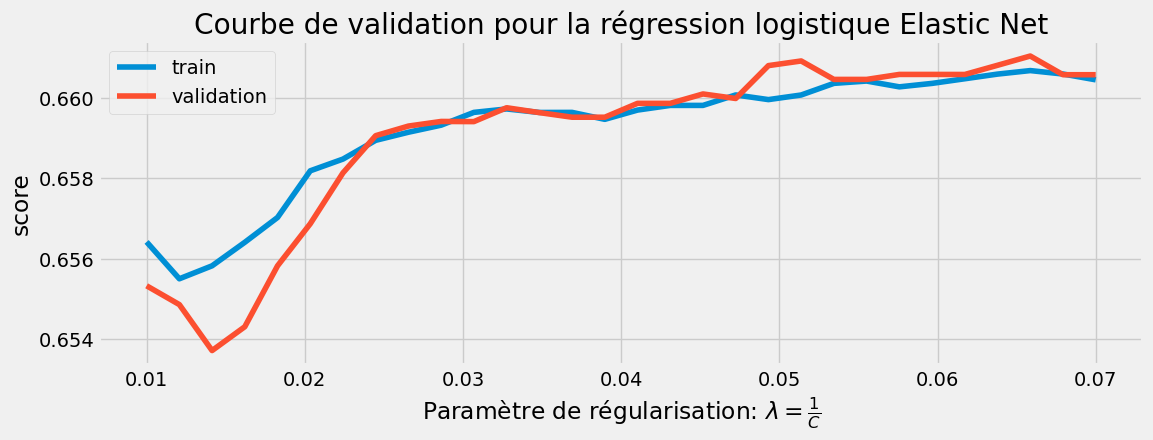

In [98]:
list_hyperparams = np.linspace(0.01, 0.07, 30)

train_score, val_score = validation_curve(logregElasticNet1, 
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Elastic Net")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

# Courbes d'apprentissage

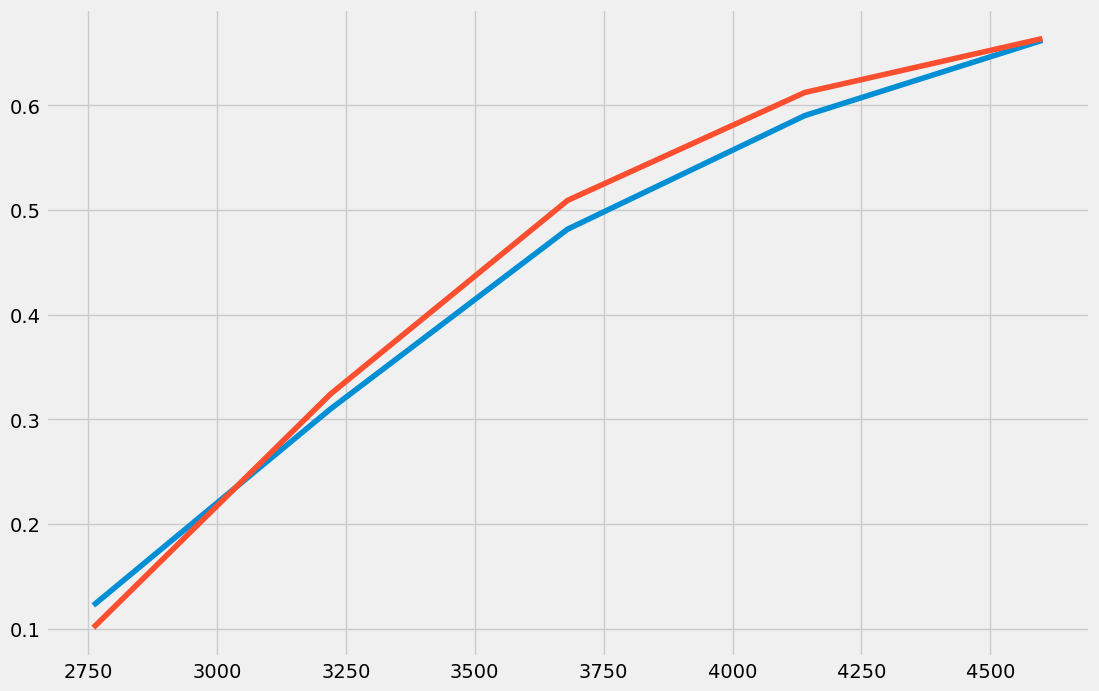

In [99]:
N, train_score, val_score = learning_curve(logregLasso, X_train_up, y_train_up, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')

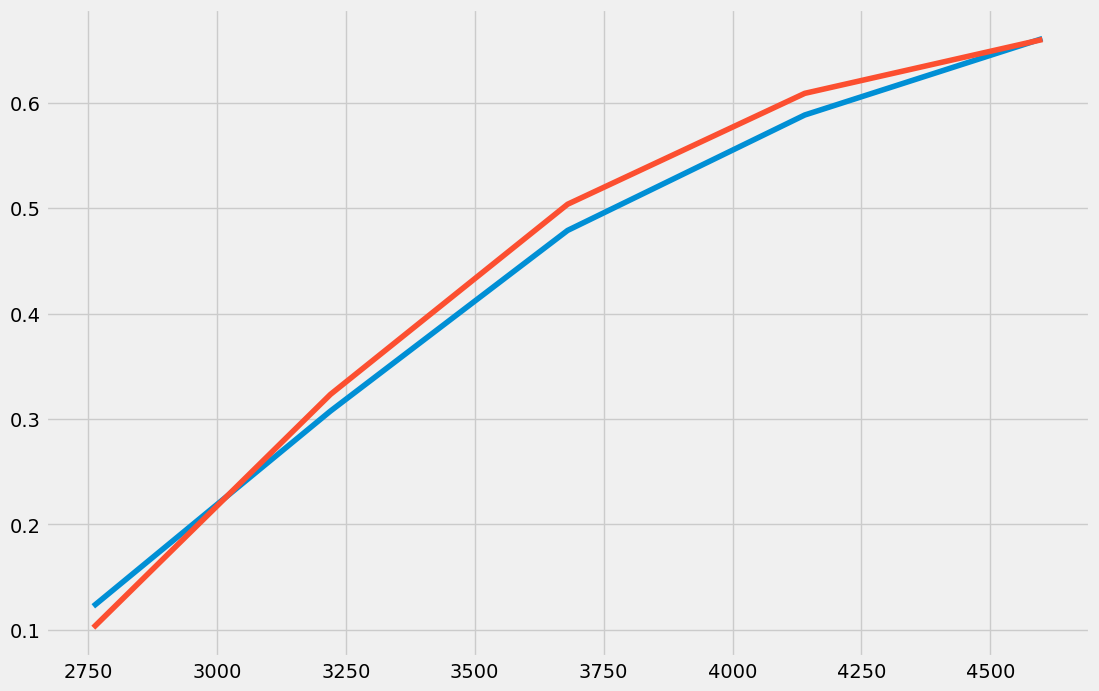

In [100]:
N, train_score, val_score = learning_curve(logregElasticNet1, X_train_up, y_train_up, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score');

#  Pipelines 

Sans sur-échantiollonnage le recall de la classe 1 est bas. Par conséquent, il va valloir pousser cette performance par exemple en changeant certains processus du pré-traitements, ou régler certains hyperparamètres dans les régressions logistiques pénalisées. 

In [101]:
### Préparer de ouveaux les features

# Ajouter 'education' et 'BPMeds' a cat_features
cat_features = df_train.select_dtypes('int64').columns
cat_features = cat_features.append(pd.Index(['education']))
cat_features = cat_features.append(pd.Index(['BPMeds']))
cat_features


#Supprimer education' et 'BPMeds' de cont_features
cont_features = df_train.select_dtypes('float64').columns
cont_features.delete([1, 3])
cont_features = cont_features.delete([1, 3])
cont_features

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')

In [102]:
cat_features

Index(['male', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD',
       'education', 'BPMeds'],
      dtype='object')

In [103]:
# Enlever la varaible 'TenYearCHD'
cat_features = cat_features.delete([5])

In [104]:
cat_features

Index(['male', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD',
       'BPMeds'],
      dtype='object')

## Pipeline 1

In [105]:
# Imputation et Normalisation
catgoricalPipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    )

continuousPipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    # KNNImputer(n_neighbors=3),
    StandardScaler(),
    # MinMaxScaler(),
    # SimpleImputer(strategy="constant"), # constante 0
    
)

preprocessor = make_column_transformer(
    (catgoricalPipeline, cat_features),
    (continuousPipeline, cont_features),
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['male', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD',
       'BPMeds'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object'))])

In [106]:
# Modélisation
logreg = LogisticRegression(
    penalty='none', 
    tol=10e-6, 
    random_state=7)

logregRidge = LogisticRegression(
    C=0.1, 
    penalty='l2', 
    tol=10e-6, 
    random_state=7)

logregLasso = LogisticRegression(
    C=10., 
    penalty='l1', 
    solver='saga', 
    tol=10e-6, 
    random_state=7)

logregElasticNet = LogisticRegression(
    C=0.1, 
    penalty='elasticnet', 
    solver='saga', 
    l1_ratio=0.7, 
    tol=10e-6, 
    random_state=7)

logreg_pipe1 = make_pipeline(preprocessor, logreg)
logregRidge_pipe1 = make_pipeline(preprocessor, logregRidge)
logregLasso_pipe1 = make_pipeline(preprocessor, logregLasso)
logregElasticNet_pipe1 = make_pipeline(preprocessor, logregElasticNet)

### logregLasso_pipe1

In [107]:
logreg_pipe1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['male', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD',
       'BPMeds'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object'))])),
                ('logisticregression',
                 LogisticRegression(penalty='none', random_state=7,
                                    tol=1e-05))])

Régression logistique + Lasso (Pipeline 1)

Matrice de confusion:
[[719   0]
 [  0 128]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       128

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847
 

Exactitude: 100.000000 



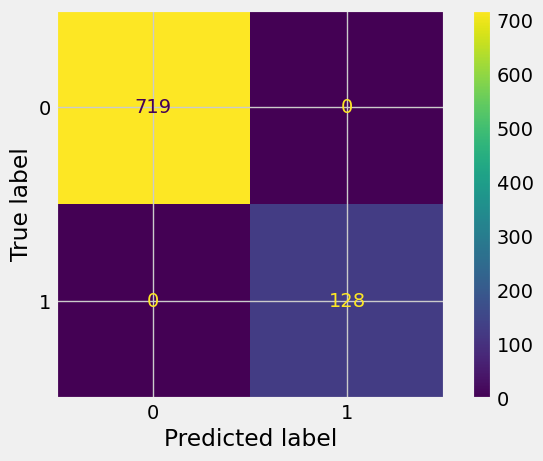

In [108]:
# Évaluation

y_train = df_train['TenYearCHD'].values
y_test = df_test['TenYearCHD'].values

## régression logistique + elasticnet
logregLasso_pipe1.fit(df_train, y_train)
y_pred = logregLasso_pipe1.predict(df_test)

print('='*35)
print('Régression logistique + Lasso (Pipeline 1)')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()

Régression logistique + Lasso (Pipeline 1)

Matrice de confusion:
[[719   0]
 [  0 128]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       719
           1       1.00      1.00      1.00       128

    accuracy                           1.00       847
   macro avg       1.00      1.00      1.00       847
weighted avg       1.00      1.00      1.00       847
 

Exactitude: 100.000000 



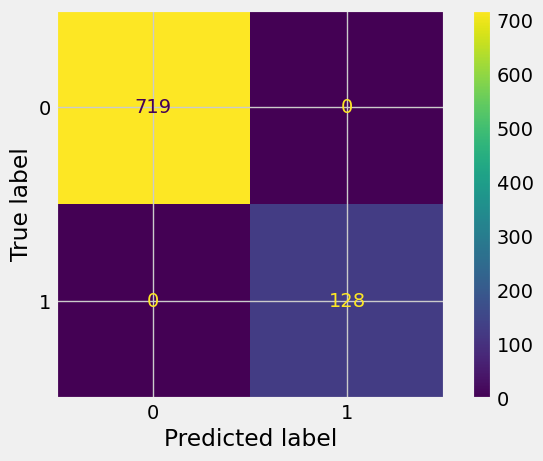

In [109]:
# Évaluation

y_train = df_train['TenYearCHD'].values
y_test = df_test['TenYearCHD'].values

## régression logistique + elasticnet
logregRidge_pipe1.fit(df_train, y_train)
y_pred = logregRidge_pipe1.predict(df_test)

print('='*35)
print('Régression logistique + Lasso (Pipeline 1)')
print('='*35, '\n')

print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred), '\n') # afficher à l'écran notre matrice de confusion
print("Rapport de classification:")
print(classification_report(y_test, y_pred), '\n')
print('Exactitude: %f' %(accuracy_score(y_test,y_pred)*100), '\n')
c_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()
plt.show()